In [12]:
### Data Analysis packages
import numpy as np
import pandas as pd
import re
import warnings

### Data Visualization packages
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

### Statistical tests for analysis
from scipy.stats import chi2_contingency

### sklearn preprocessing tools
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from category_encoders import CountEncoder
from sklearn.preprocessing import OneHotEncoder, RobustScaler

### Train-Test Split
from sklearn.model_selection import train_test_split

### SMOTE for oversampling
from imblearn.over_sampling import SMOTE

### Machine Learning Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

### Evaluation metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [13]:
## Initial settings
matplotlib.rcParams["font.size"] = 10
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.facecolor"] = '#00000000'

sns.set_style("darkgrid")
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )
sns.set_theme(color_codes=True)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

warnings.filterwarnings('ignore')

In [14]:
dataset_path = 'data\Dataset.csv'
data_dict_path = 'data\Data_Dictionary.csv'

df_raw = pd.read_csv(dataset_path)
df_info= pd.read_csv(data_dict_path)

In [15]:
df_info

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for the loan for another car (0 means No and 1 means otherwise)
3,Bike_Owned,Any bike owned by client (0 means No and 1 means otherwise)
4,Active_Loan,Any other active loan at the time of aplication of loan (0 means No and 1 means otherwise)
5,House_Own,Any house owned by client (0 means No and 1 means otherwise)
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied for the loan


In [16]:
df_raw.shape

(121856, 40)

In [17]:
df_raw.duplicated().sum()

0

- There are no duplicate values

<Axes: >

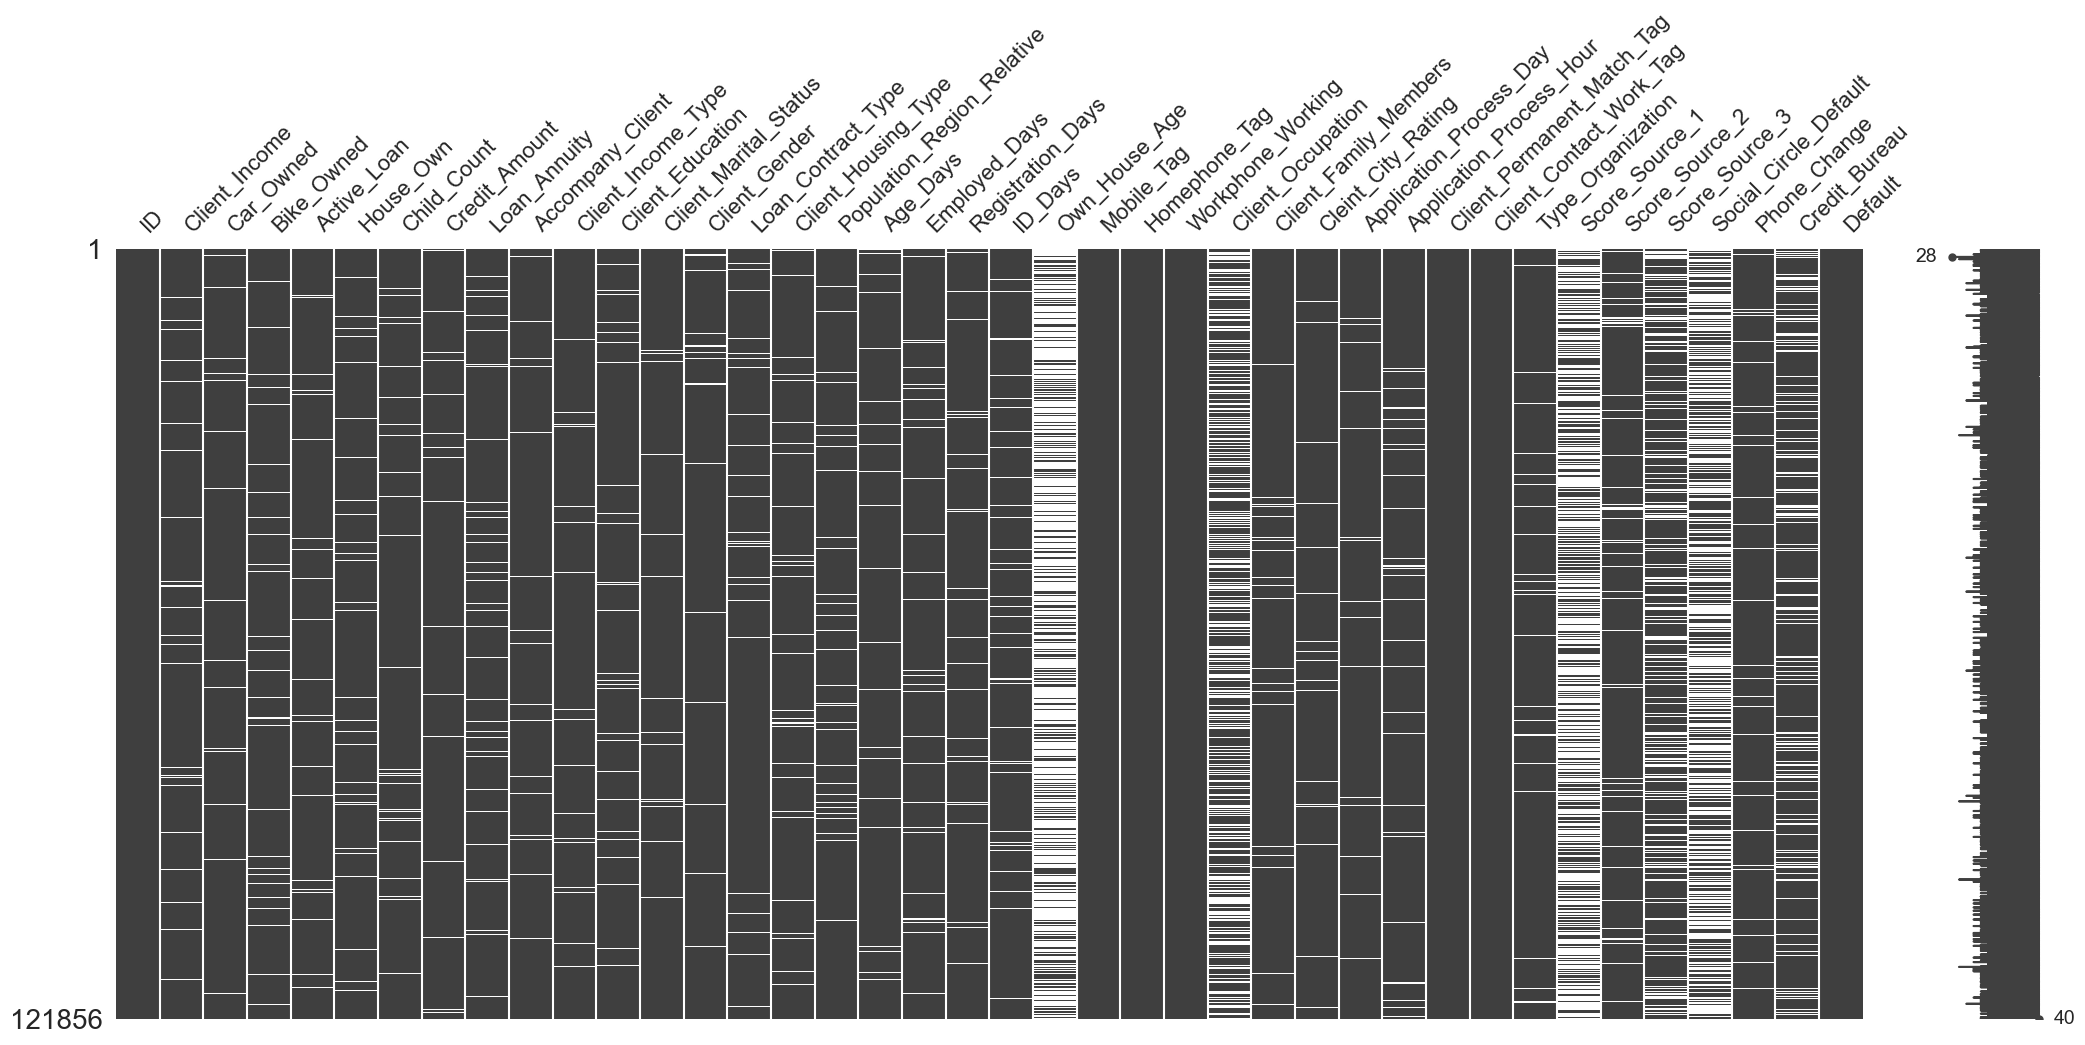

In [18]:
msno.matrix(df_raw)

In [19]:
## Percentage of Null values
null_df = (df_raw.isnull().sum()).sort_values(ascending=False).to_frame()
null_df.columns = ["No of Null values"]
null_df["% of Null values"] = round(null_df["No of Null values"]/len(df_raw)*100, 2)
null_df[null_df["No of Null values"] > 0]

,No of Null values,% of Null values
Own_House_Age,80095,65.73
Score_Source_1,68835,56.49
Social_Circle_Default,61928,50.82
Client_Occupation,41435,34.00
Score_Source_3,26921,22.09
Credit_Bureau,18540,15.21
ID_Days,5968,4.90
Score_Source_2,5686,4.67
Population_Region_Relative,4857,3.99
Loan_Annuity,4812,3.95


- Almost all the variables except ID, some client variables, phone variables and Default have missing values

In [20]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

#### Analysis of Target Variable `Default`

In [21]:
df_raw["Default"].value_counts()

Default
0    112011
1      9845
Name: count, dtype: int64

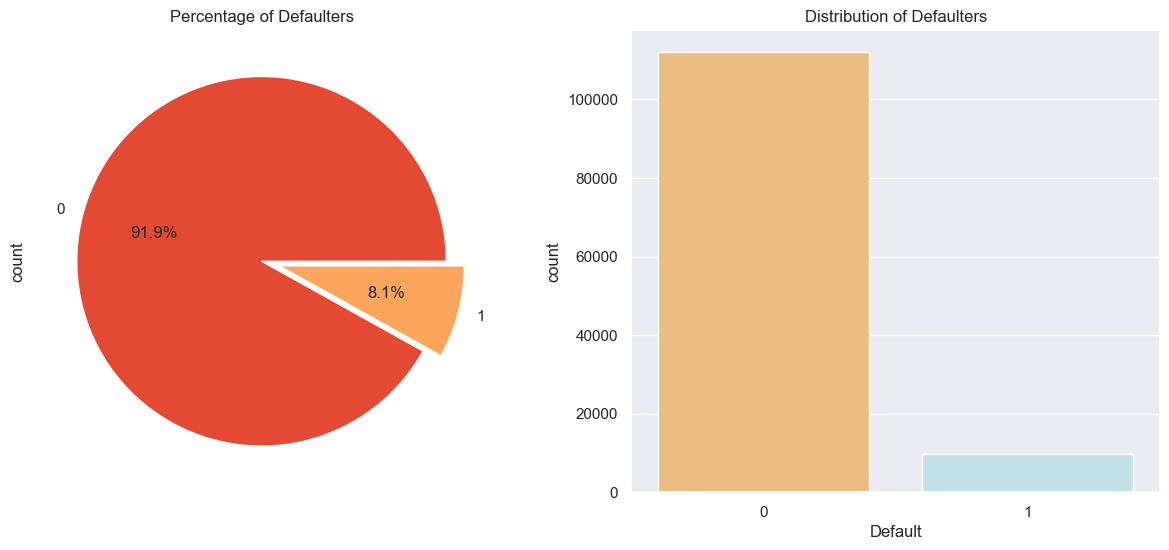

In [22]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
df_raw['Default'].value_counts().plot.pie(explode=[0,0.1],colors = sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of Defaulters')
sns.countplot(x='Default',data=df_raw,ax=ax2,palette='RdYlBu')
ax2.set_title('Distribution of Defaulters')
plt.show();

- The **dataset** is highly **imbalanced**

#### Basic details of all columns

In [23]:
def display_unique_values(df):
    for i, column in enumerate(df.columns):
        unique_values = df[column].unique()
        num_unique = len(unique_values)
        
        if num_unique > 10:
            unique_display = list(unique_values[:4]) + ['...'] + list(unique_values[-4:])
        else:
            unique_display = list(unique_values)

        print(f"{i}.  {column}")
        print(f"--> {df[column].dtypes}")
        print(f"--> {num_unique}")
        print(f"--> {unique_display}")
        print("\n")


print(f"Column Name, Total Unique Values and Unique Values of the respective column.\n")
display_unique_values(df_raw)

Column Name, Total Unique Values and Unique Values of the respective column.

0.  ID
--> int64
--> 121856
--> [12142509, 12138936, 12181264, 12188929, '...', 12173765, 12103937, 12170623, 12105610]


1.  Client_Income
--> object
--> 1517
--> ['6750', '20250', '18000', '15750', '...', '23557.5', '13140', '9764.1', '12840.75']


2.  Car_Owned
--> float64
--> 3
--> [0.0, 1.0, nan]


3.  Bike_Owned
--> float64
--> 3
--> [0.0, 1.0, nan]


4.  Active_Loan
--> float64
--> 3
--> [1.0, 0.0, nan]


5.  House_Own
--> float64
--> 3
--> [0.0, nan, 1.0]


6.  Child_Count
--> float64
--> 15
--> [0.0, 1.0, 2.0, nan, '...', 19.0, 12.0, 14.0, 9.0]


7.  Credit_Amount
--> object
--> 6817
--> ['61190.55', '15282', '59527.35', '53870.4', '...', '38522.25', '89138.7', '88885.8', '135534.6']


8.  Loan_Annuity
--> object
--> 16681
--> ['3416.85', '1826.55', '2788.2', '2295.45', '...', 3550.5, 1736.55, 3388.05, 2989.35]


9.  Accompany_Client
--> object
--> 8
--> ['Alone', 'Relative', 'Others', 'Kids', nan, '

- There are some **numeric columns** that are **represented as object columns**
- Presence of special characters is observed ('##' in `Accompany_Client` column)
- In the `Client_Gender` column, 'XNA' value can be replaced by mode value of the column

In [24]:
potential_numerical_columns = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Score_Source_3']

numeric_issues = {}

for col in potential_numerical_columns:
    try:
        df_raw[col].astype(float)
    except ValueError as e:
        numeric_issues[col] = str(e)

numeric_issues

{'Client_Income': "could not convert string to float: '$'",
 'Credit_Amount': "could not convert string to float: '$'",
 'Loan_Annuity': "could not convert string to float: '$'",
 'Population_Region_Relative': "could not convert string to float: '@'",
 'Age_Days': "could not convert string to float: 'x'",
 'Employed_Days': "could not convert string to float: 'x'",
 'Registration_Days': "could not convert string to float: 'x'",
 'ID_Days': "could not convert string to float: 'x'",
 'Score_Source_3': "could not convert string to float: '&'"}

- Presence of special characters and letters is observed in these columns

In [25]:
df_raw.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [26]:
potential_categorical_columns = ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Default']

for col in potential_categorical_columns:
    print(f"Value counts for {col}:")
    print(df_raw[col].value_counts())
    print("\n")

Value counts for Car_Owned:
Car_Owned
0.0    77724
1.0    40551
Name: count, dtype: int64


Value counts for Bike_Owned:
Bike_Owned
0.0    78948
1.0    39284
Name: count, dtype: int64


Value counts for Active_Loan:
Active_Loan
0.0    59208
1.0    59013
Name: count, dtype: int64


Value counts for House_Own:
House_Own
1.0    81798
0.0    36397
Name: count, dtype: int64


Value counts for Mobile_Tag:
Mobile_Tag
1    121855
0         1
Name: count, dtype: int64


Value counts for Homephone_Tag:
Homephone_Tag
0    97424
1    24432
Name: count, dtype: int64


Value counts for Workphone_Working:
Workphone_Working
0    87590
1    34266
Name: count, dtype: int64


Value counts for Default:
Default
0    112011
1      9845
Name: count, dtype: int64




- All of the **potential_categorical_columns** can be considered as **categorical columns** (1 being Yes and 0 being No)
- The `Mobile_Tag` column can be dropped since it contains only one record with a value of 0, while the rest of the records have a value of 1

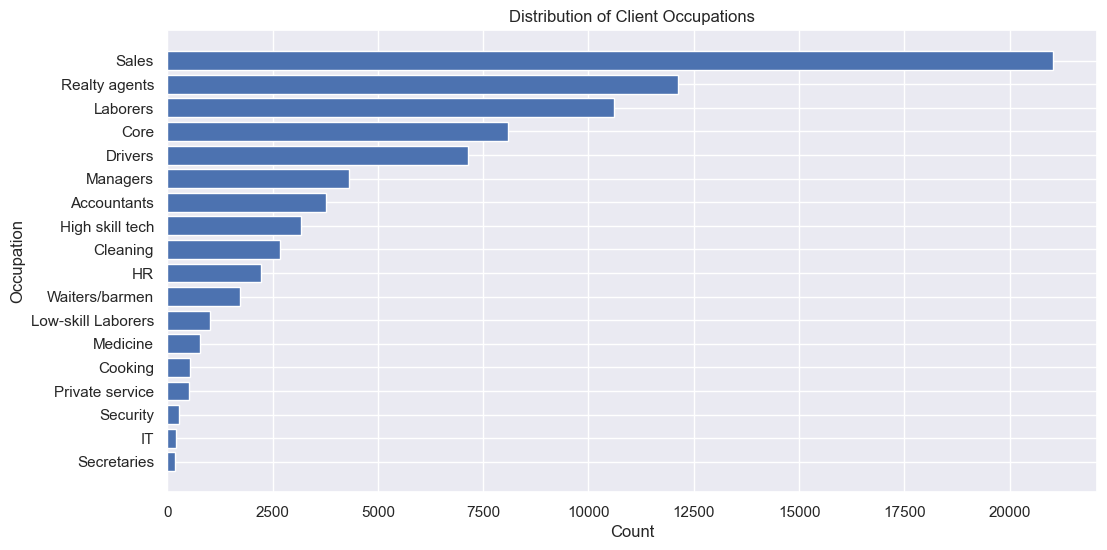

In [27]:
# Filter out missing values in the 'Client_Occupation' column
temp_df = df_raw[df_raw['Client_Occupation'].notna()]

unique_occupations = temp_df['Client_Occupation'].unique()
occupation_counts = temp_df['Client_Occupation'].value_counts()


plt.figure(figsize=(12, 6))
plt.barh(unique_occupations, occupation_counts)
plt.gca().invert_yaxis()


plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Distribution of Client Occupations')

plt.show()

- Sales is the most prevalent occupation among clients, with a significantly higher count than any other occupation

- Realty agents, laborers, and core business roles follow as the next most common occupations, each with counts close to 12,500, 11,000 and 8,000 respectively

- Occupations like IT, Security, and Secretaries are among the least common, with counts well below 1,000

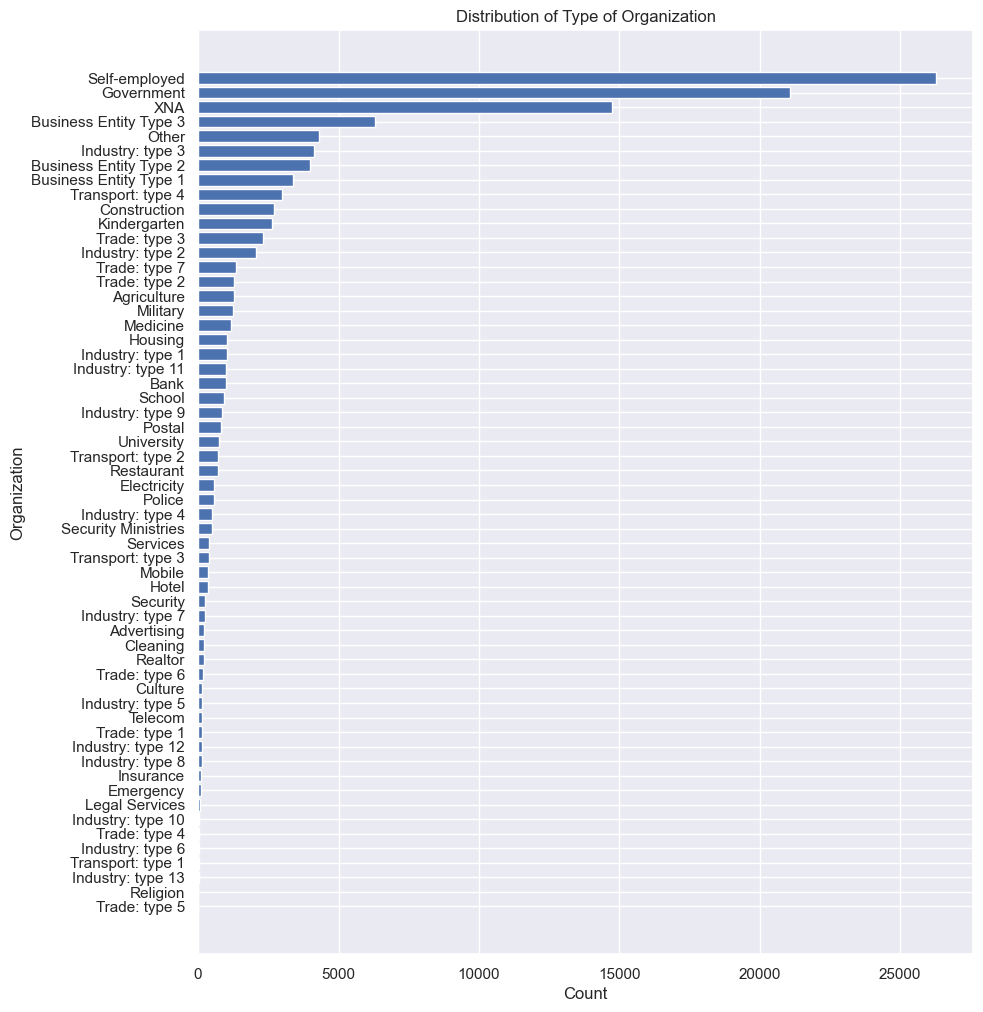

In [28]:
# Filter out missing values in the 'Type_Organization' column
temp_df = df_raw[df_raw['Type_Organization'].notna()]

unique_organizations = temp_df['Type_Organization'].unique()
organization_counts = temp_df['Type_Organization'].value_counts()


plt.figure(figsize=(10, 12))
plt.barh(unique_organizations, organization_counts)
plt.gca().invert_yaxis()


plt.xlabel('Count')
plt.ylabel('Organization')
plt.title('Distribution of Type of Organization')

plt.show()

- The most common type of organization among clients is self-employed, with a significantly higher count than any other type

- Government and XNA are also prevalent types of organizations, each with substantial counts close to the self-employed category

- Organizations related to Insurance, Telecom, Realtors, Advertising and a few others have the lowest representation, with counts well below 1,000

## Data Preprocessing

In [29]:
df_raw = pd.read_csv(dataset_path)

In [30]:
df_raw.drop(columns = ['ID','Application_Process_Day','Application_Process_Hour'], inplace=True)

- We drop the above columns based on domain knowledge

In [31]:
def replace_unwanted_chars(value):
    if isinstance(value, str):
        return re.sub(r'[$#@,]', '', value)
    return value

df_raw = df_raw.applymap(replace_unwanted_chars)

- As some special characters are observed in the data, we clean the data

In [32]:
potential_numerical_columns = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Score_Source_3']

for col in potential_numerical_columns:
    df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')

- Converting numeric features to numeric datatype

In [33]:
potential_categorical_columns = ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working']

for col in potential_categorical_columns:
    df_raw[col] = df_raw[col].replace({1: 'Yes', 0: 'No'})

- Converting features having 1 and 0 to categorical variables

In [34]:
df_raw['Client_Gender'].value_counts()

Client_Gender
Male      78463
Female    40977
XNA           3
Name: count, dtype: int64

- As there are just 3 records with 'XNA' value, we can impute them with the mode value

In [35]:
df_raw['Client_Gender'].replace('XNA', df_raw['Client_Gender'].mode().iloc[0], inplace=True)

In [36]:
df_raw['Mobile_Tag'].value_counts()

Mobile_Tag
Yes    121855
No          1
Name: count, dtype: int64

- The `Mobile_Tag` column can be dropped since it contains only one record belonging to 'No', while rest of the records belong to 'Yes'

In [37]:
df_raw.drop(columns='Mobile_Tag', inplace=True)

In [38]:
df_raw['Accompany_Client'].value_counts()

Accompany_Client
Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
               12
Name: count, dtype: int64

- As there are just 12 records with '' (empty) value, we can impute them with the mode value

In [39]:
df_raw['Accompany_Client'].replace('', df_raw['Accompany_Client'].mode().iloc[0], inplace=True)

In [40]:
## Percentage of Null values
null_df = (df_raw.isnull().sum()).sort_values(ascending=False).to_frame()
null_df.columns = ["No of Null values"]
null_df["% of Null values"] = round(null_df["No of Null values"]/len(df_raw)*100, 2)
null_df[null_df["No of Null values"] > 0]

,No of Null values,% of Null values
Own_House_Age,80095,65.73
Score_Source_1,68835,56.49
Social_Circle_Default,61928,50.82
Client_Occupation,41435,34.00
Score_Source_3,26922,22.09
Credit_Bureau,18540,15.21
ID_Days,5985,4.91
Score_Source_2,5686,4.67
Population_Region_Relative,4868,3.99
Loan_Annuity,4826,3.96


- The features `Own_House_Age`, `Score_Source_1`, `Social_Circle_Default` have more than 35% of null values
- These features can be dropped as they are likely to provide unreliable information due to the high proportion of missing data

In [41]:
percent_missing = (df_raw.isnull().sum() / len(df_raw)) * 100

columns_to_drop = percent_missing[percent_missing > 35].index

df_raw.drop(columns=columns_to_drop, inplace=True)

print("Columns with missing values greater than 35 percent have been dropped.")

df_raw.head()

Columns with missing values greater than 35 percent have been dropped.


,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,6750.0,No,No,Yes,No,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,Yes,No,Sales,2.0,2.0,Yes,Yes,Self-employed,0.478787,NaN,63.0,NaN,0
1,20250.0,Yes,No,Yes,NaN,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.0,21.0,No,Yes,NaN,2.0,2.0,Yes,Yes,Government,0.215068,NaN,NaN,NaN,0
2,18000.0,No,No,Yes,No,1.0,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,NaN,331.0,No,No,Realty agents,2.0,2.0,Yes,Yes,Self-employed,0.552795,0.329655,277.0,0.0,0
3,15750.0,No,No,Yes,Yes,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,365243.0,NaN,775.0,No,No,NaN,2.0,3.0,Yes,Yes,XNA,0.135182,0.631355,1700.0,3.0,0
4,33750.0,Yes,No,Yes,No,2.0,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516.0,4043.0,No,No,Laborers,4.0,1.0,Yes,Yes,Business Entity Type 3,0.301182,0.355639,674.0,1.0,0


In [42]:
numeric_cols = df_raw.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_raw.select_dtypes(include=['object']).columns.tolist()

In [43]:
histogram_numeric_cols = []

for col in numeric_cols:
    if len(df_raw[col].unique()) > 3:
        histogram_numeric_cols.append(col)

histogram_numeric_cols

['Client_Income',
 'Child_Count',
 'Credit_Amount',
 'Loan_Annuity',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Client_Family_Members',
 'Cleint_City_Rating',
 'Score_Source_2',
 'Score_Source_3',
 'Phone_Change',
 'Credit_Bureau']

- We select columns with more than 3 unique values to plot their histograms to observe and analyze their distributions
- This will help us understand the underlying patterns and variability within the data, facilitating more informed decisions for further analysis and modeling

# Histograms

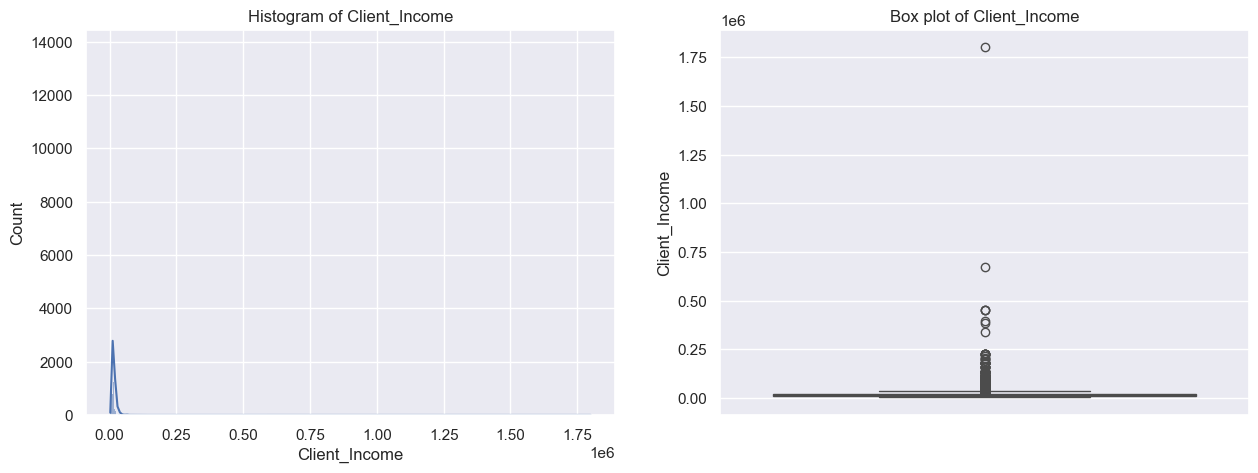

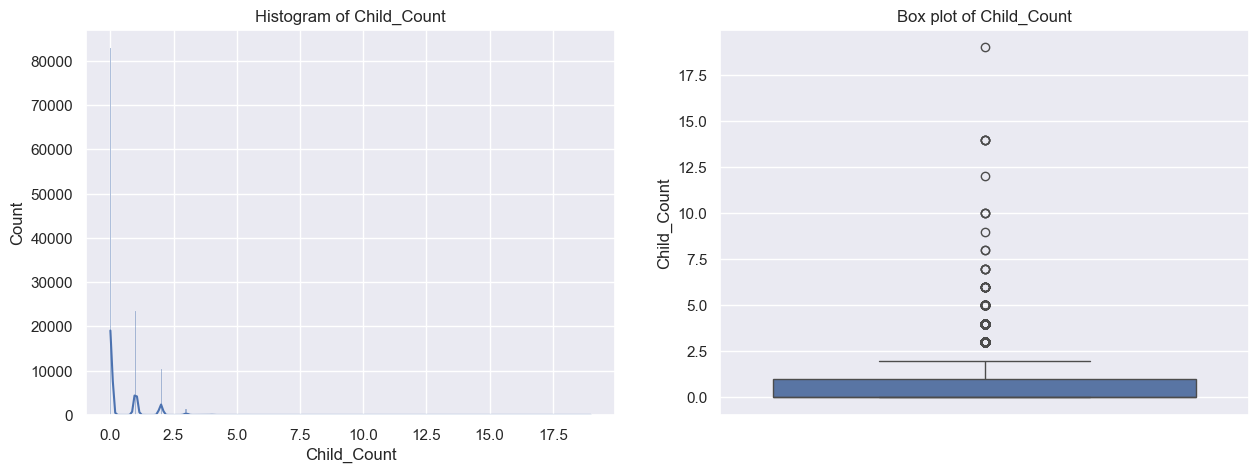

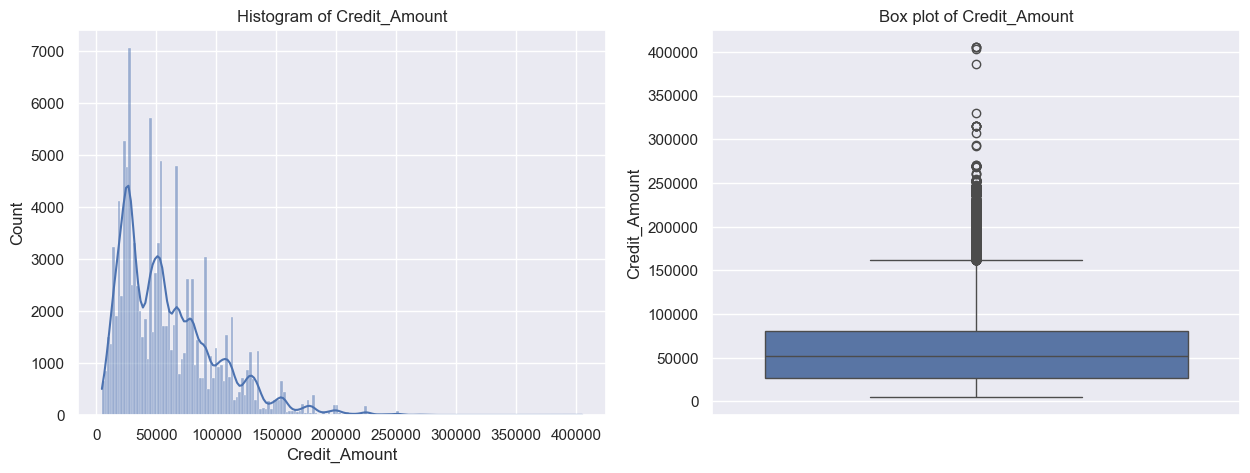

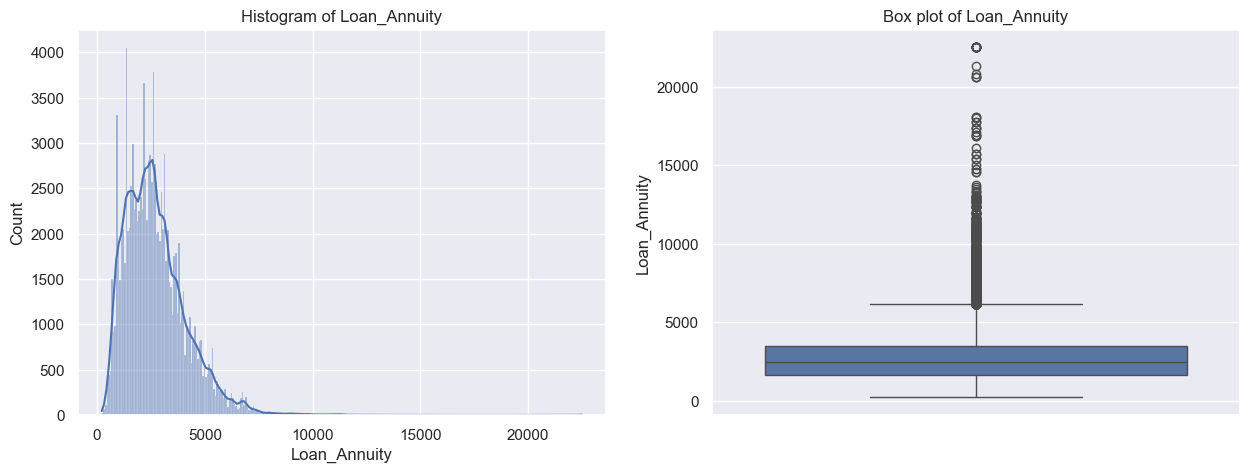

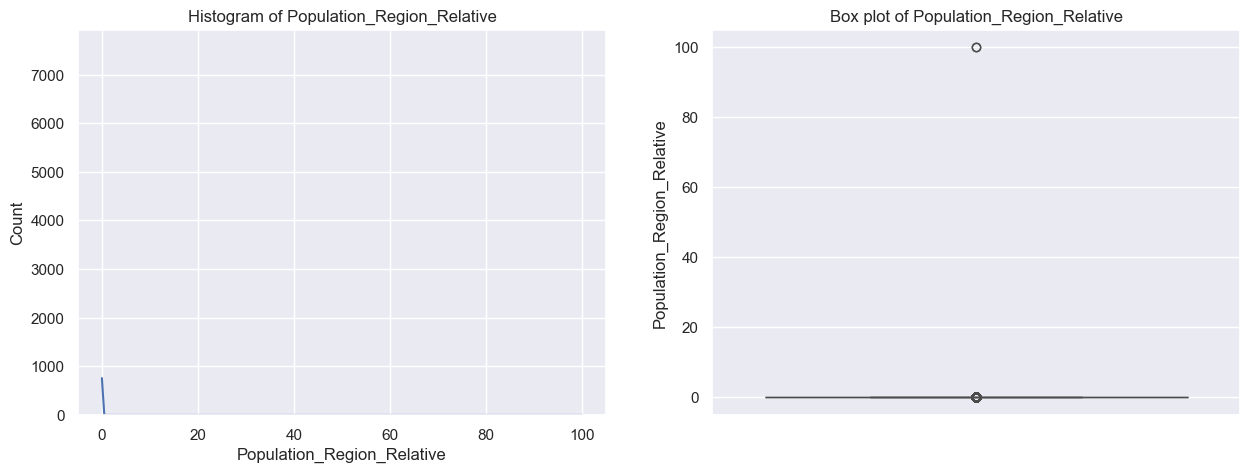

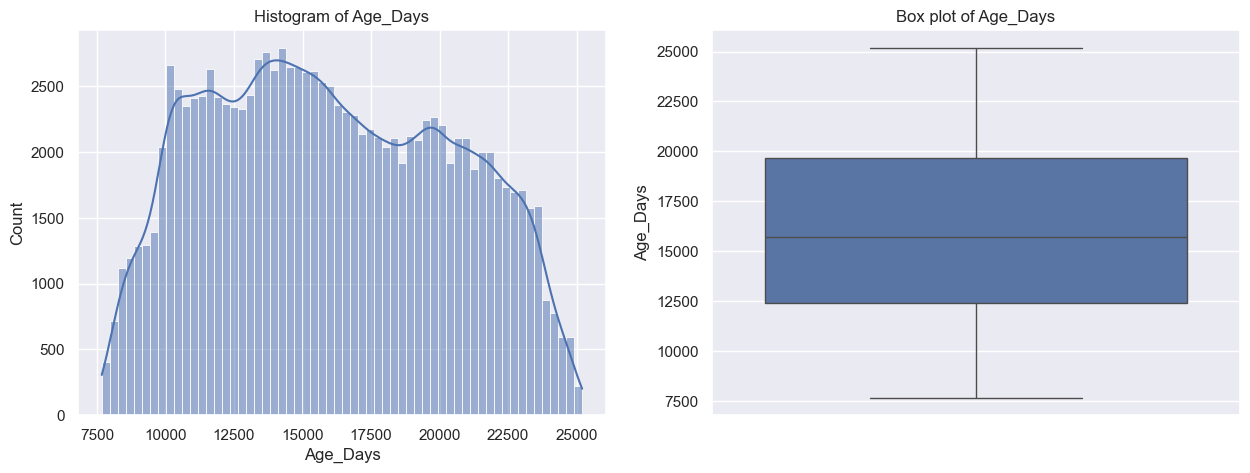

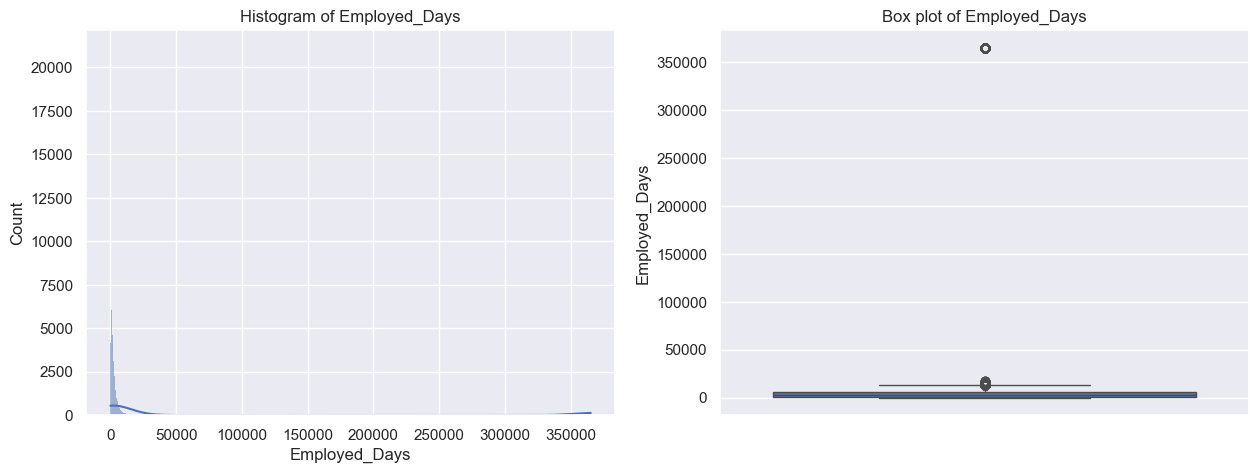

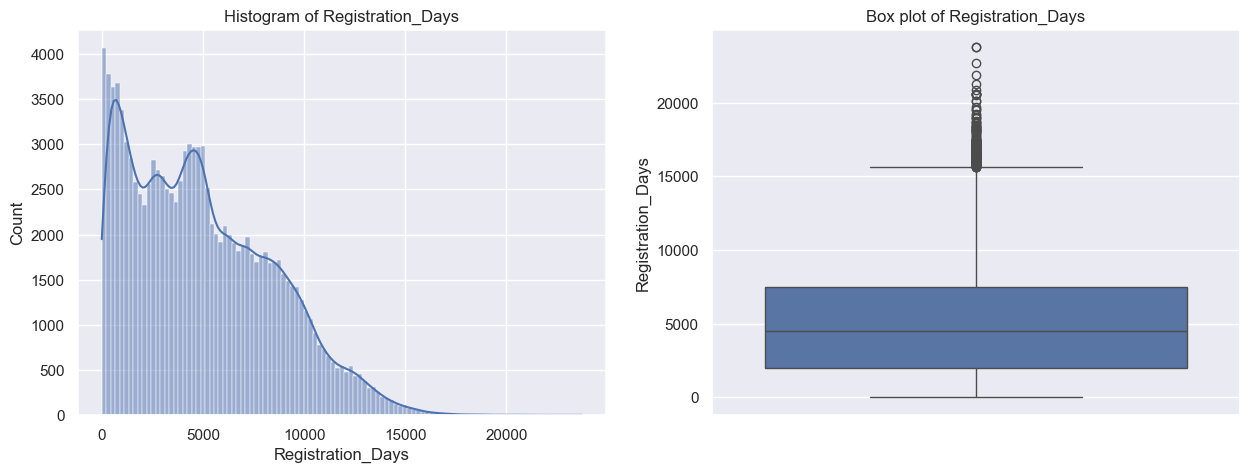

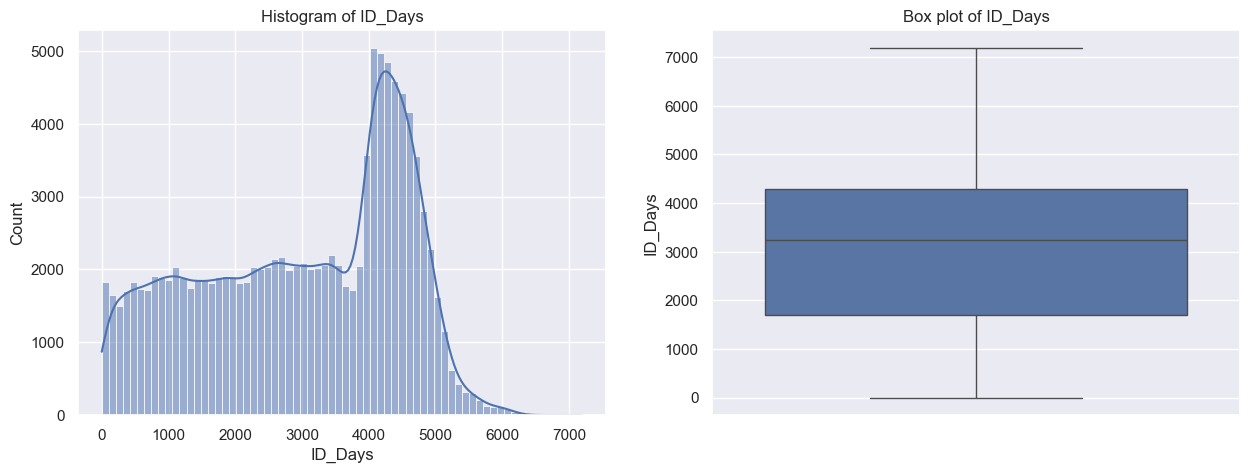

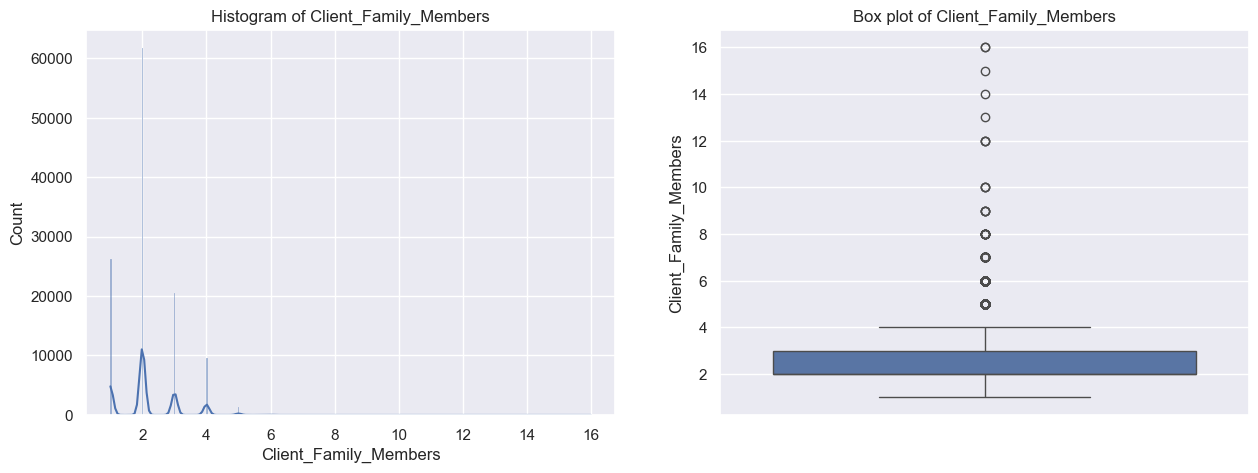

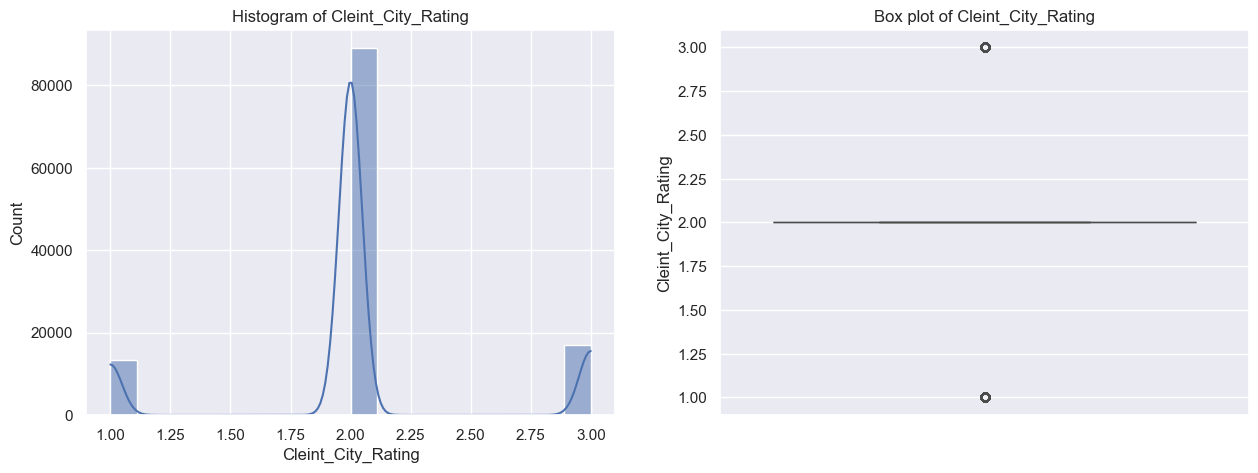

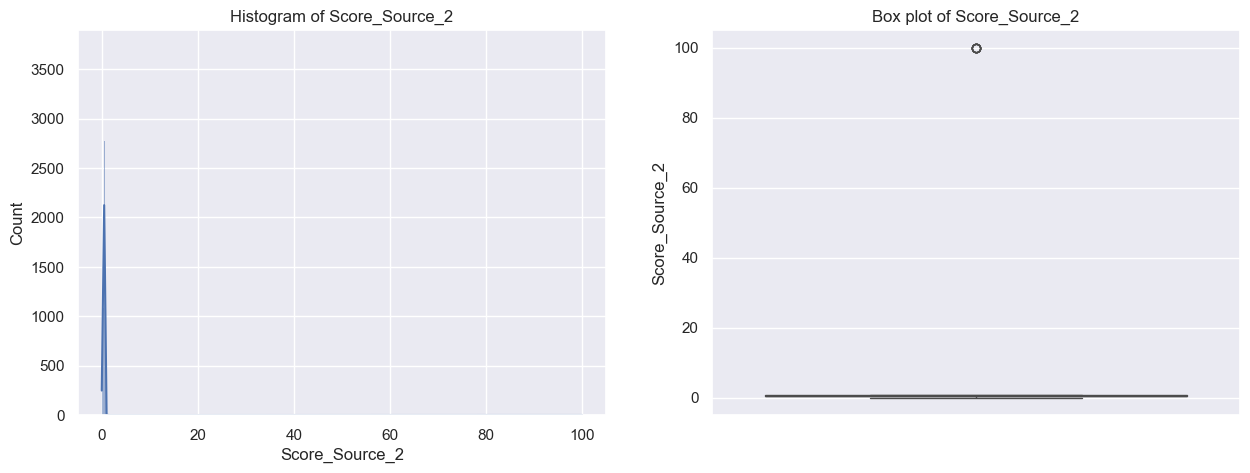

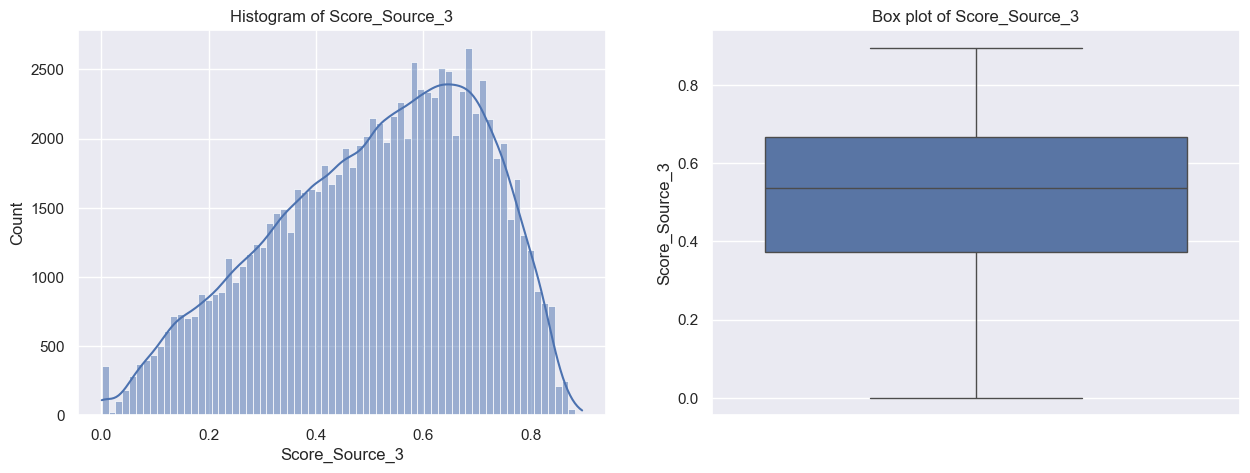

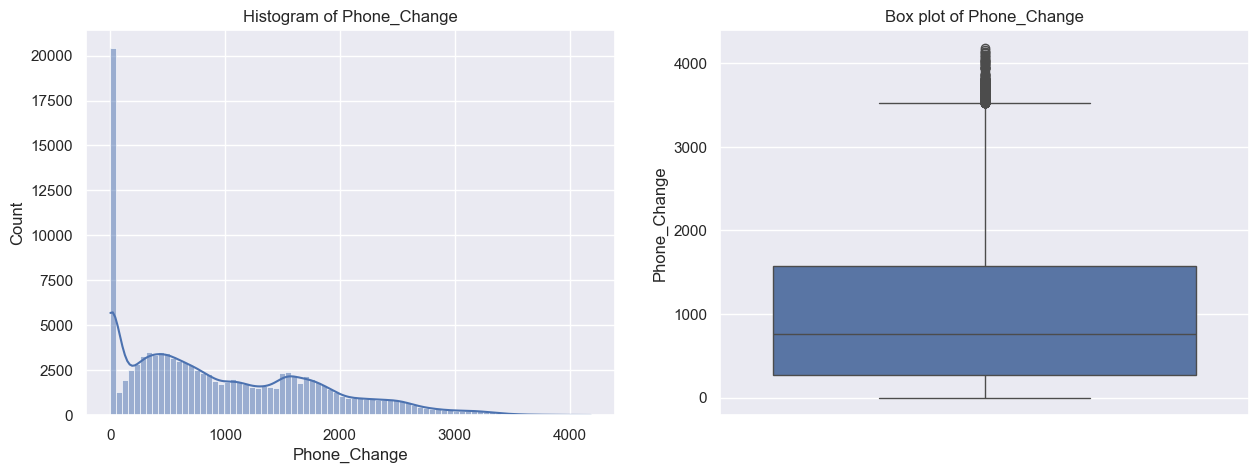

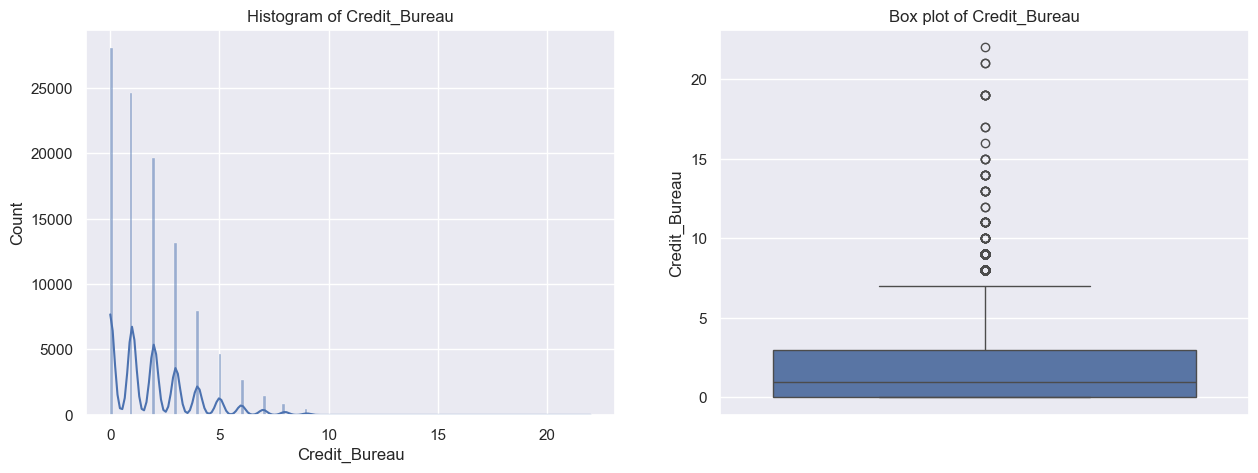

In [35]:
def plot_histograms_and_boxplots(df, numeric_cols):
    for col in numeric_cols:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        
        sns.histplot(df[col], kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {col}')
        
        
        sns.boxplot(y=df[col], ax=axes[1])
        axes[1].set_title(f'Box plot of {col}')
        
        plt.show()

plot_histograms_and_boxplots(df_raw, histogram_numeric_cols)

- **Client_Income**

      The distribution is heavily right-tailed with notable outliers, indicating a significant number of clients with lower incomes and a few with exceptionally high incomes

- **Child_Count**

      Most clients have 0-2 children, with higher counts being outliers, suggesting that large families are relatively rare in the dataset

- **Credit_Amount**

      The feature is right-tailed with outliers starting around 1,60,000 up to 4,00,000, showing that while most clients have moderate credit amounts, there are some with very high credit amounts

- **Loan_Annuity**

      This feature is right-tailed with outliers ranging from 6,000 to 24,000, indicating that while most loan annuities are lower, there are a few very high annuities

- **Population_Region_Relative**

      Outliers are present near 0 and 100, suggesting that some regions have extremely low or high population densities relative to others

- **Age_Days**

      The distribution is close to normal without any outliers, indicating a typical age distribution among clients

- **Employed_Days**

      This feature is heavily right-tailed with outliers near 3,50,000, which is unlikely. Entries above the maximum whisker can be dropped to remove these unrealistic values

- **Registration_Days**

      The distribution is slightly right-tailed with outliers from 15,500 to 24,500, indicating that most registration periods are shorter, but some are much longer

- **ID_Days**

      The distribution is mostly normal with no outliers, suggesting a typical spread in the number of ID days among clients

- **Client_Family_Members**

      There are outliers, and capping values till 6 can help normalize the distribution and mitigate the impact of large family sizes

- **Client_City_Rating**

      Client city is rated on a scale of 1 to 3

- **Score_Source_2**

      The feature is right-tailed with outliers near 100, indicating that most scores are lower with a few very high scores

- **Score_Source_3**

      The distribution looks normal with no outliers, suggesting a typical spread of scores without extreme values

- **Phone_Change**

      The distribution is right-tailed with outliers between 3,500 and 4,250, showing that while most phone changes are recent, some clients have changed not their phones since years

- **Credit_Bureau**

      The feature is right-tailed with a wavy KDE plot and outliers from 7 to 22, indicating a varied number of enquiries by clients in the past year, with fewer clients having a very high number of enquiries

In [34]:
def handle_outliers(df):
    # Function to cap outliers based on IQR
    def cap_outliers(series, lower_bound, upper_bound):
        series = np.where(series > upper_bound, upper_bound, series)
        # series = np.where(series < lower_bound, lower_bound, series)
        return series

   
    Q1 = df['Population_Region_Relative'].quantile(0.25)
    Q3 = df['Population_Region_Relative'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df['Population_Region_Relative'] = cap_outliers(df['Population_Region_Relative'], lower_bound, upper_bound)

    
    Q1 = df['Employed_Days'].quantile(0.25)
    Q3 = df['Employed_Days'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df = df[df['Employed_Days'] <= upper_bound]

    
    Q1 = df['Score_Source_2'].quantile(0.25)
    Q3 = df['Score_Source_2'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df['Score_Source_2'] = cap_outliers(df['Score_Source_2'], lower_bound, upper_bound)

    return df

df_raw = handle_outliers(df_raw)

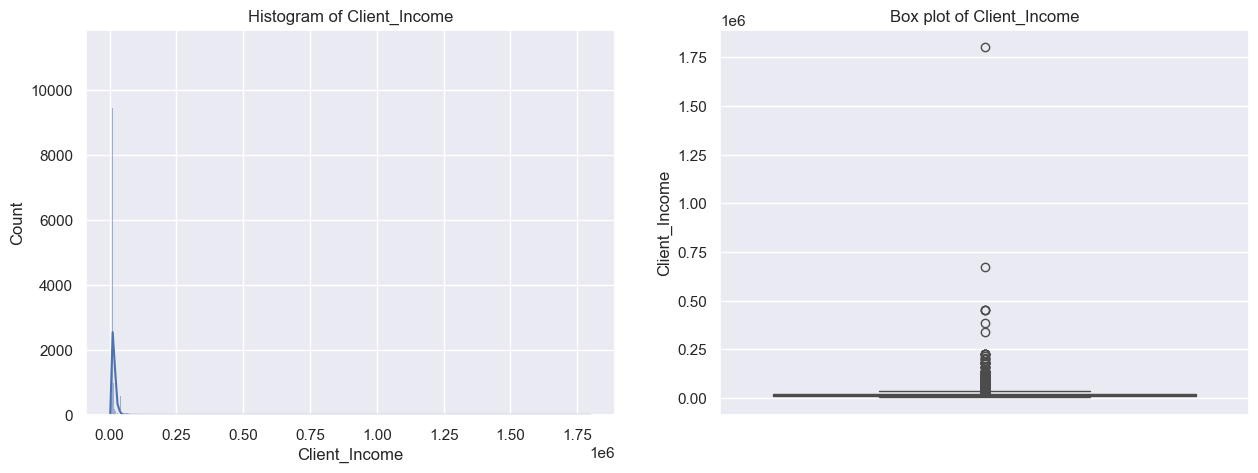

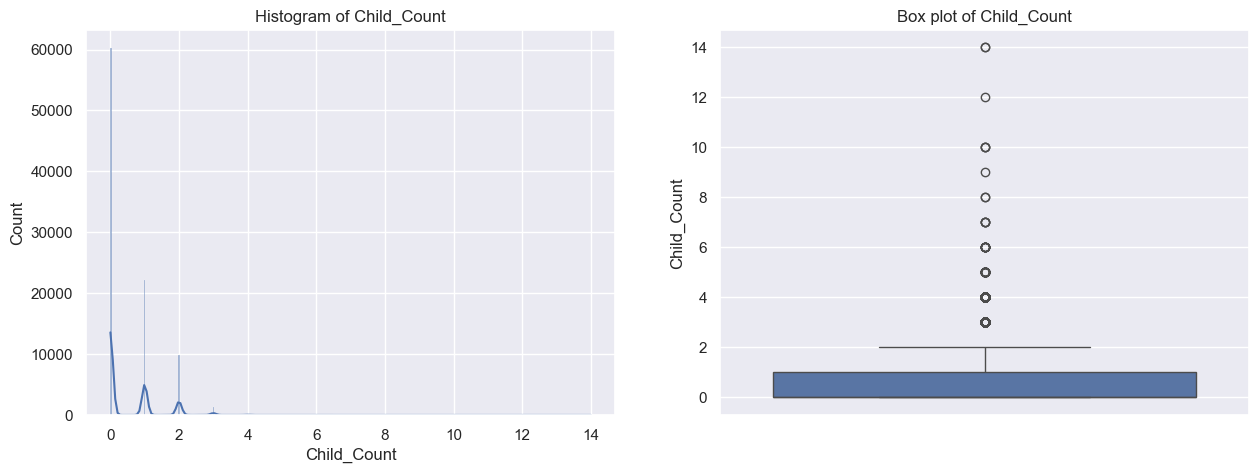

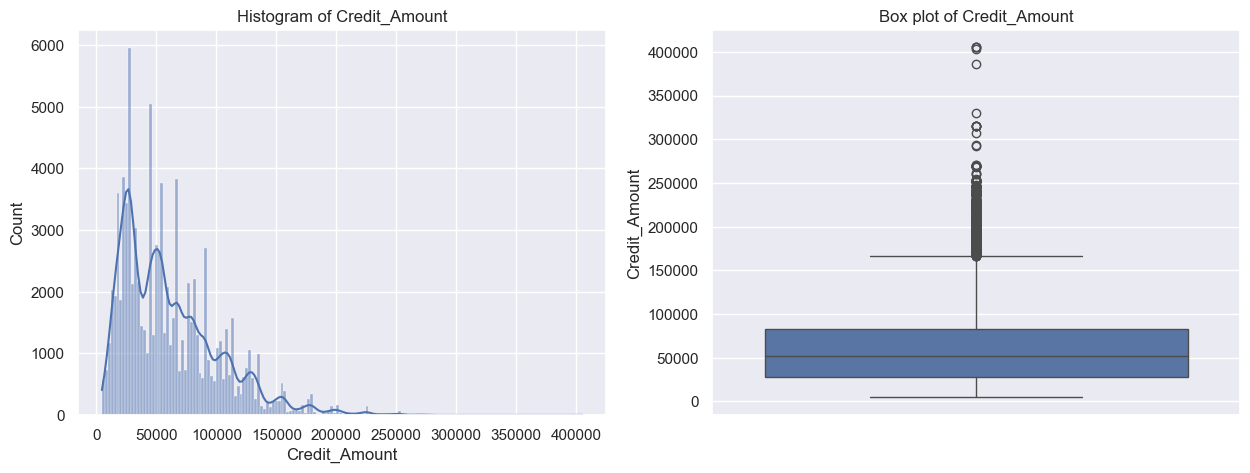

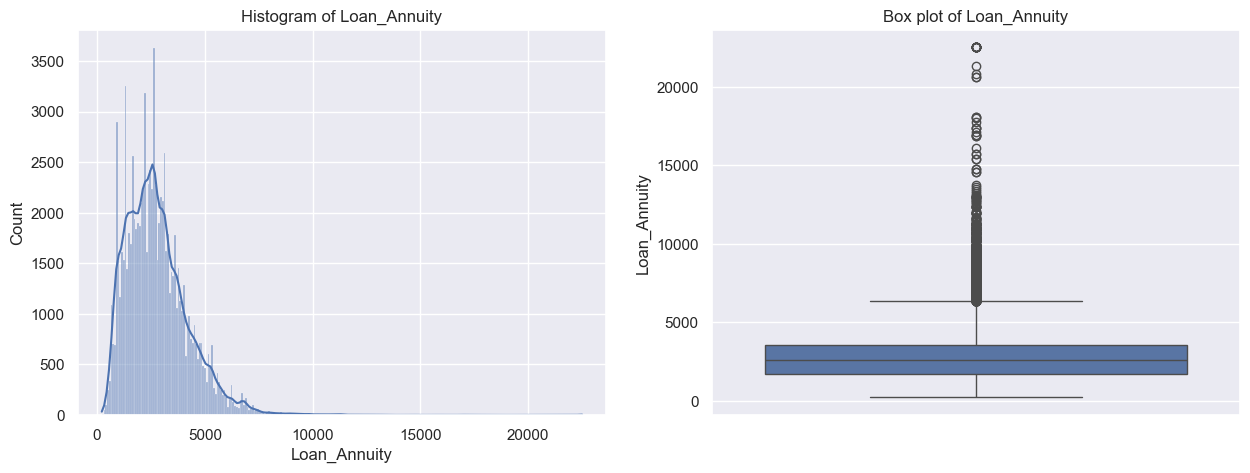

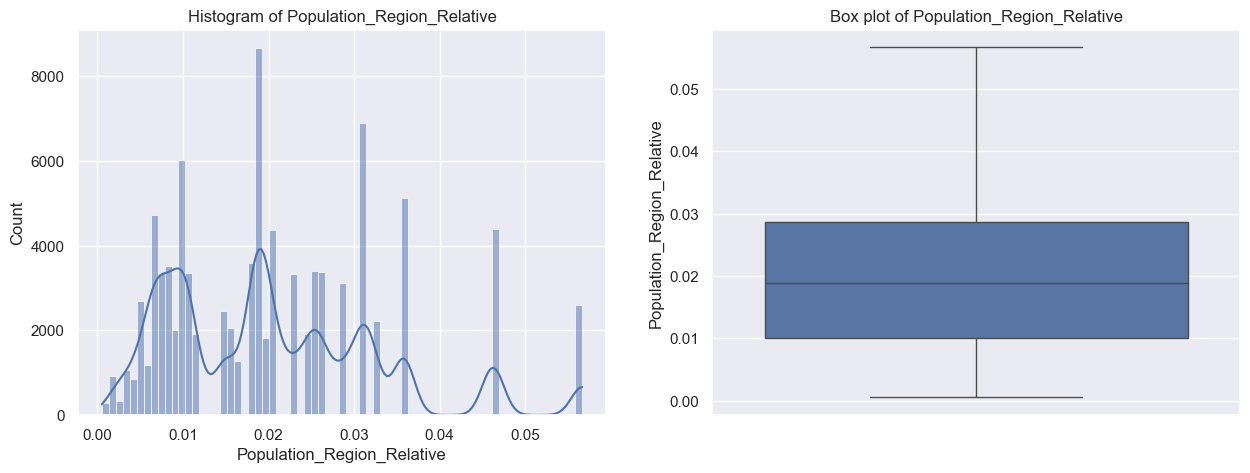

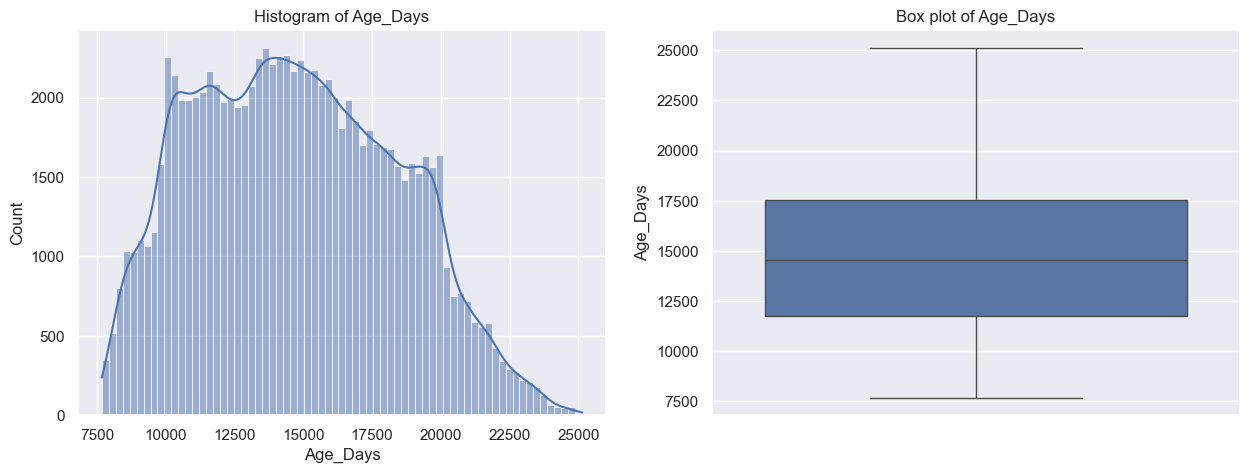

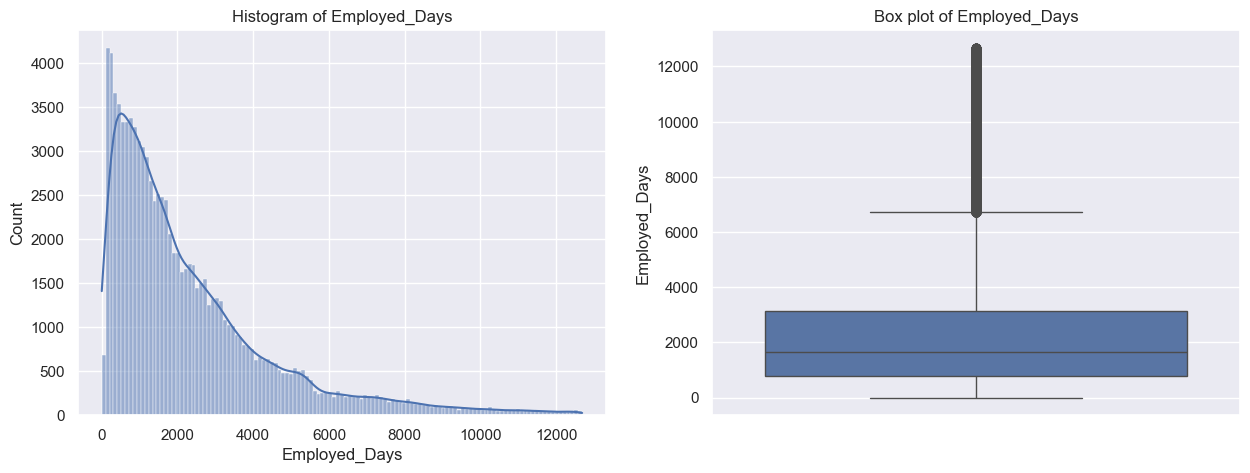

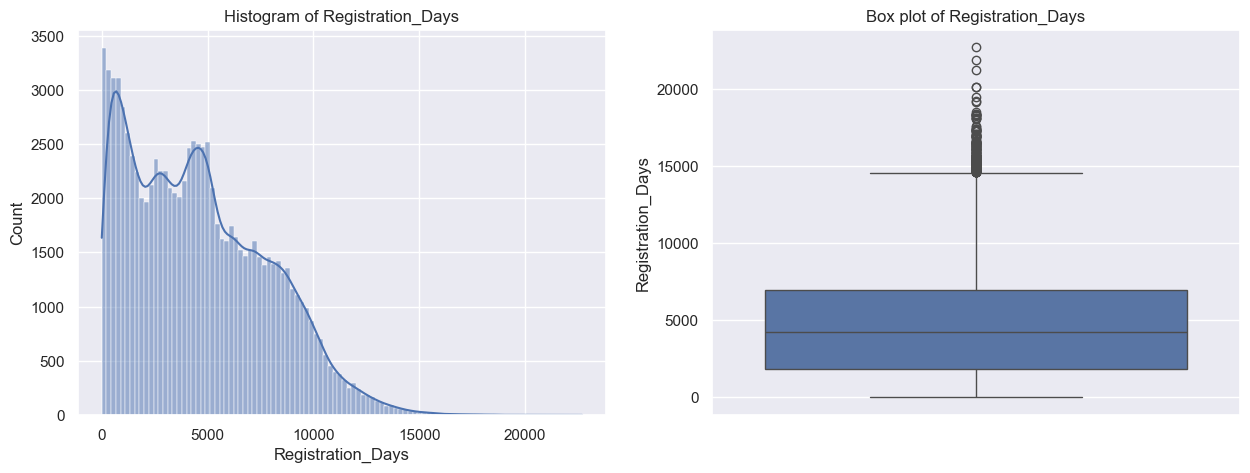

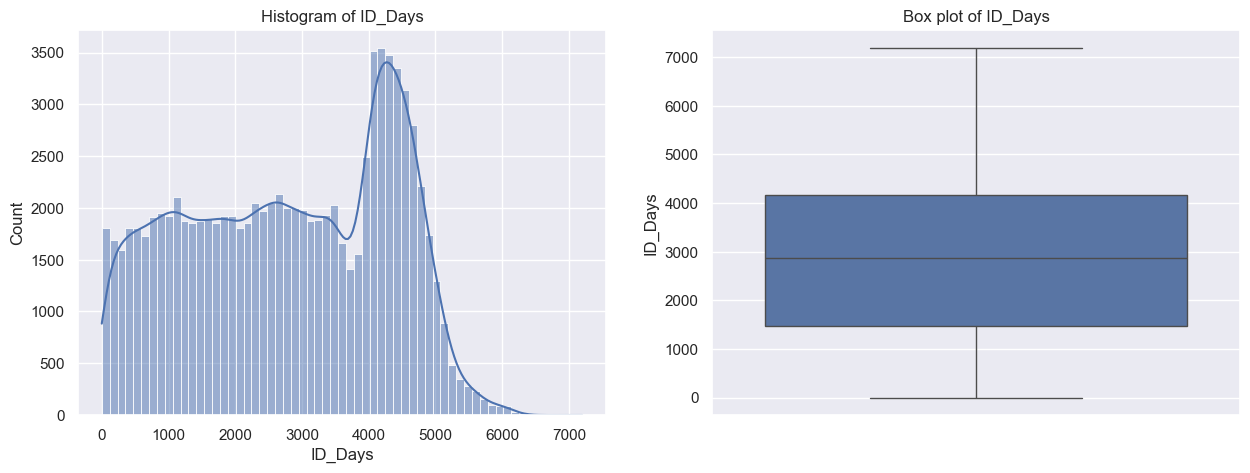

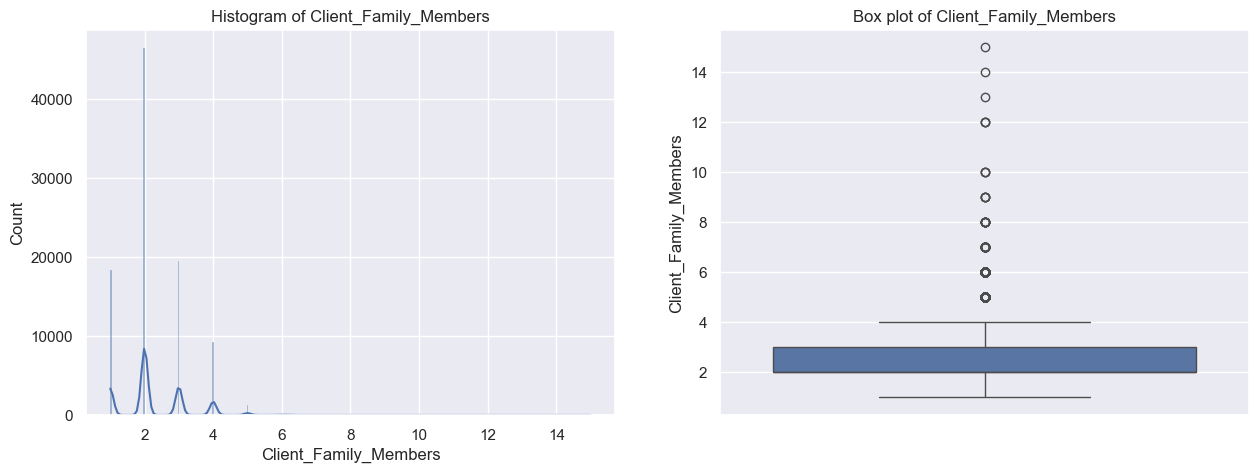

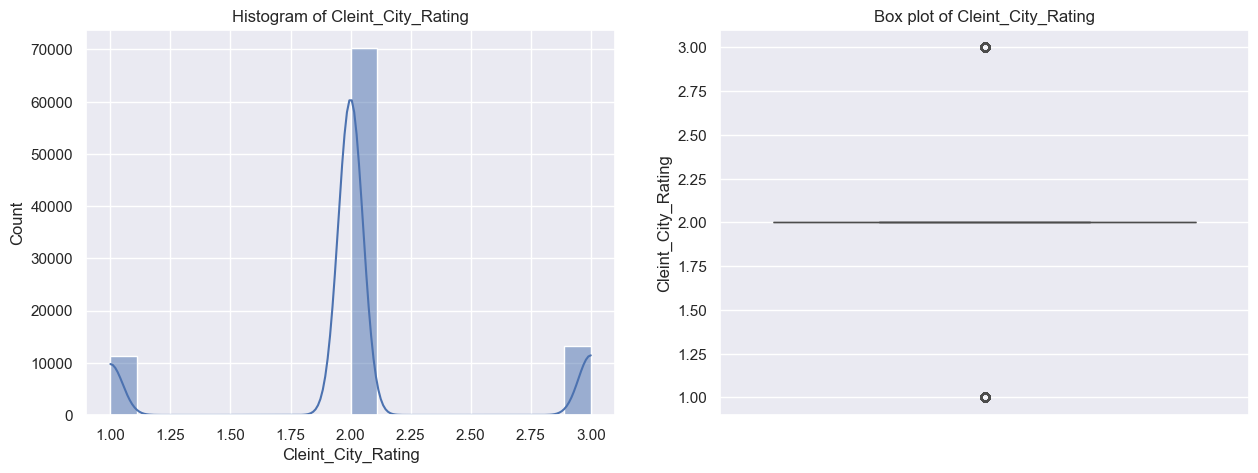

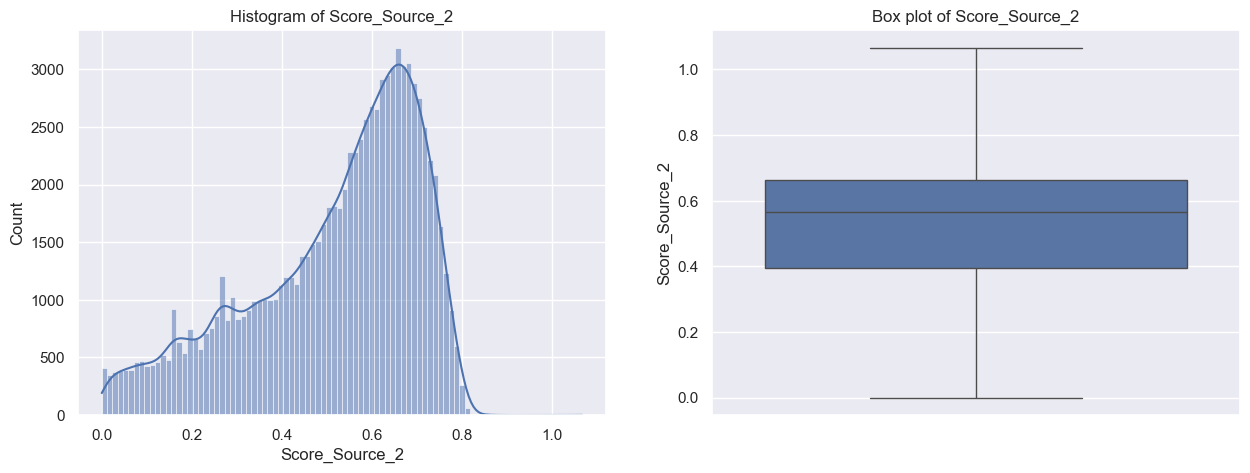

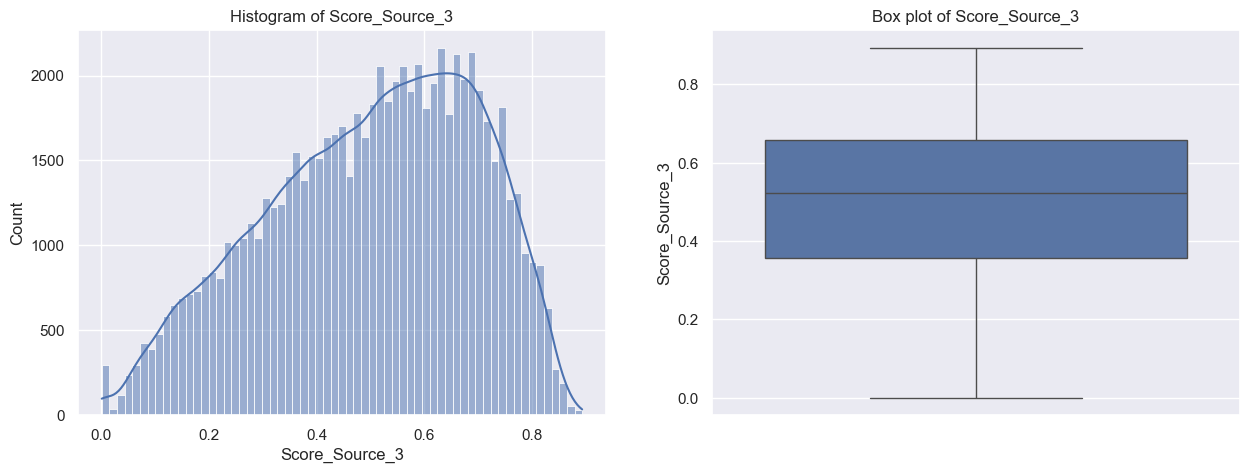

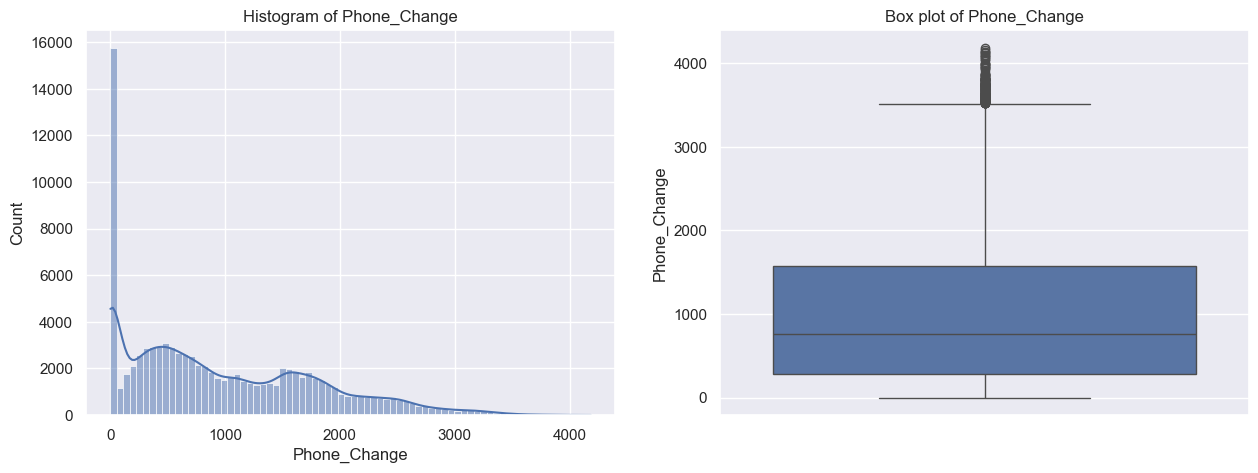

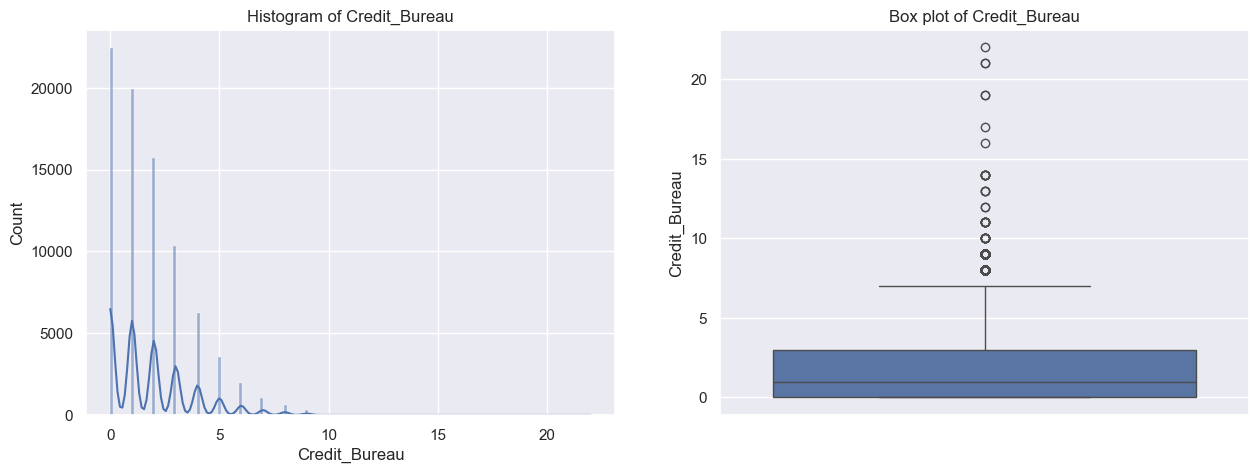

In [35]:
plot_histograms_and_boxplots(df_raw, histogram_numeric_cols)

- **Client_Income**, **Child_Count**, **Credit_Amount**, **Loan_Annuity**, **Registration_Days**, **Client_Family_Members**, **Client_City_Rating**, **Phone_Change**, **Credit_Bureau**

      The outliers in these features have been left unchanged as they can be considered realistic representations of the data
      
      These extreme values, although far from the average, reflect genuine cases and provide valuable insights into the diversity and variability within the dataset
      
      By retaining these outliers, we preserve the integrity of the data

- **Population_Region_Relative**

      Outliers near 0 and 100 have been capped based on the IQR method, providing a more consistent view of population density across regions

- **Employed_Days**

      Entries with impossible values (outliers near 350,000) have been removed, reducing the skewness of the distribution and eliminating unrealistic data points

- **Score_Source_2**

      Right-tailed outliers near 100 have been capped based on the IQR method, reducing the skewness and bringing the extreme values within a more reasonable range, creating a more balanced distribution

<Axes: >

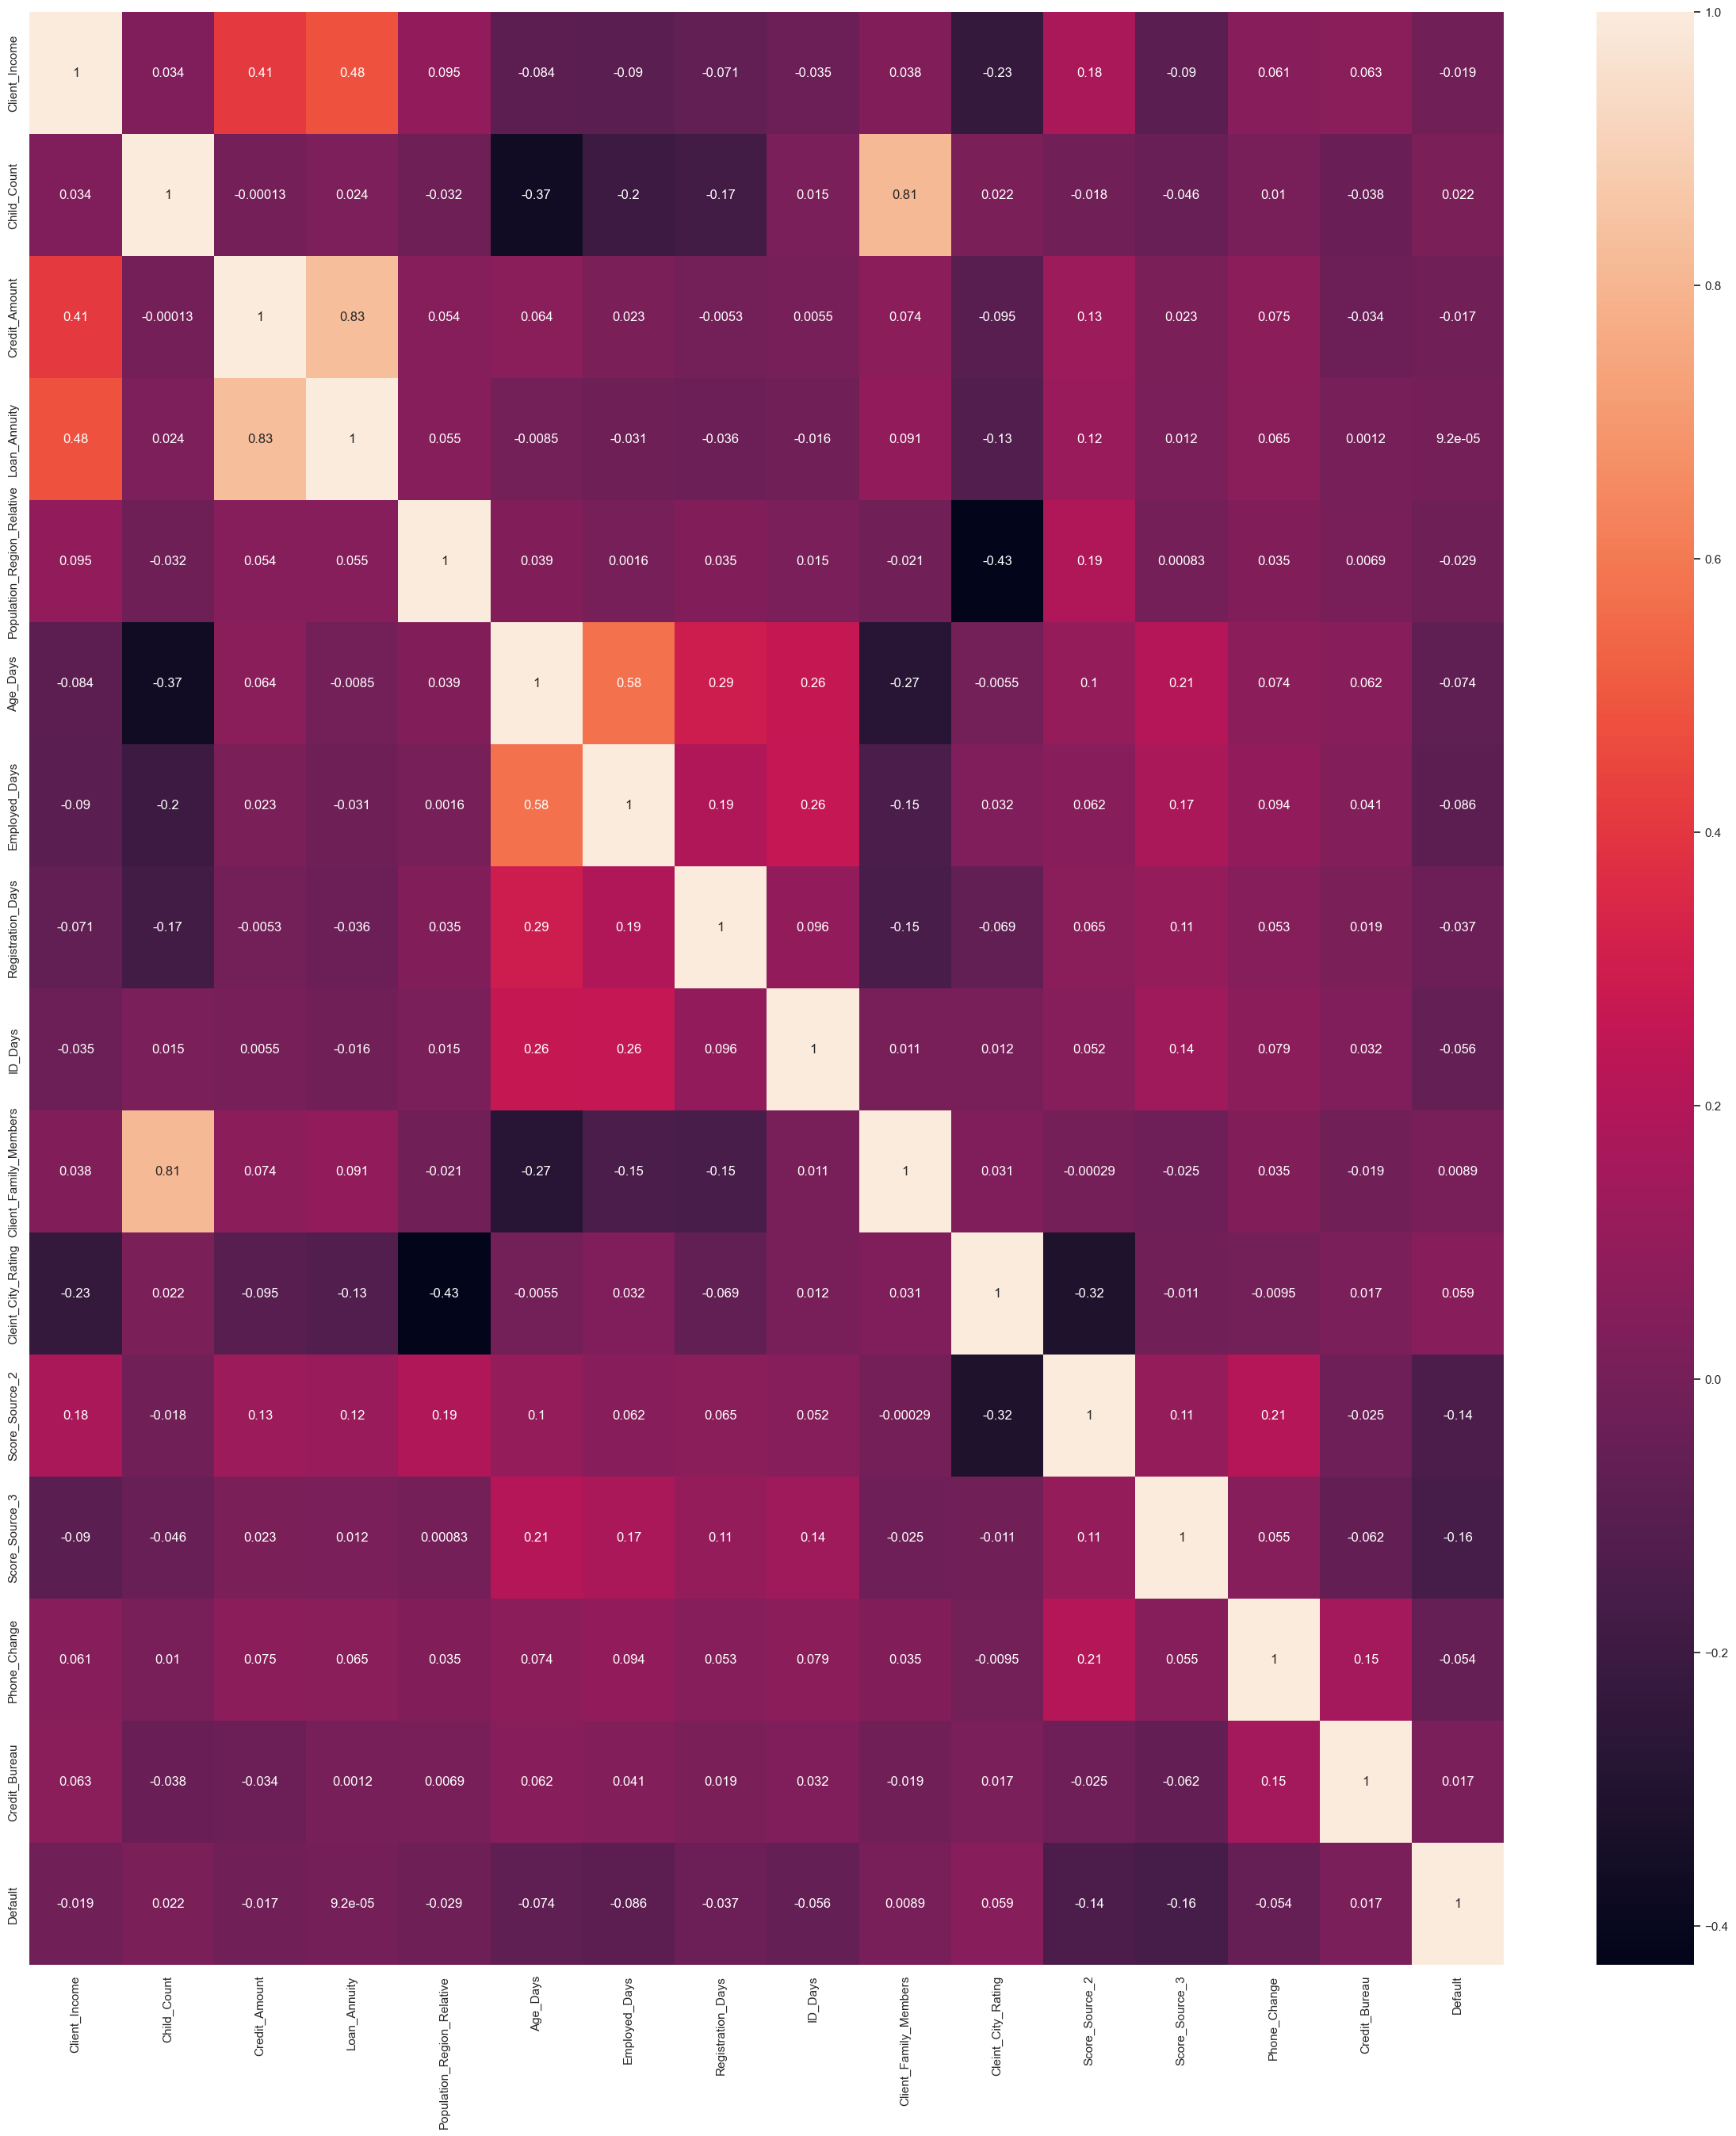

In [44]:
# Correlation Heatmap
plt.figure(figsize=(30, 32))
sns.heatmap(df_raw[df_raw.select_dtypes(include=['number']).columns.tolist()].corr(method='spearman'), fmt='.2g', annot=True)

- `Child_Count` and `Client_Family_Members` have a strong positive correlation, as families with more children naturally have more family members

- We will retain all the columns that have a correlation of less than -0.03 and greater than +0.03 for model training

In [45]:
spearman_corr = df_raw[df_raw.select_dtypes(include=['number']).columns.tolist()].corr(method='spearman')
default_corr = spearman_corr['Default']


filtered_columns = default_corr[(default_corr < -0.025) | (default_corr > 0.025)].index.tolist()
if 'Default' in filtered_columns:
    filtered_columns.remove('Default')

filtered_columns

['Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Cleint_City_Rating',
 'Score_Source_2',
 'Score_Source_3',
 'Phone_Change']

In [46]:
columns_to_drop = []

for col in numeric_cols:
    if col not in filtered_columns and col != 'Default':
        columns_to_drop.append(col)

columns_to_drop

['Client_Income',
 'Child_Count',
 'Credit_Amount',
 'Loan_Annuity',
 'Client_Family_Members',
 'Credit_Bureau']

- Based on domain knowledge, we will retain certain columns and drop others

In [47]:
columns_to_drop.remove('Loan_Annuity')
columns_to_drop

['Client_Income',
 'Child_Count',
 'Credit_Amount',
 'Client_Family_Members',
 'Credit_Bureau']

In [48]:
df_raw.drop(columns=columns_to_drop, inplace=True)

In [49]:
numeric_cols = df_raw.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_raw.select_dtypes(include=['object']).columns.tolist()

len(numeric_cols), len(categorical_cols)

(11, 17)

In [50]:
def chi_square_test(df, target_col, categorical_cols):
    results = {}
    for column in categorical_cols:
        contingency_table = pd.crosstab(df[column], df[target_col])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        results[column] = p
    return results

results = chi_square_test(df_raw[categorical_cols + ['Default']].dropna(), 'Default', categorical_cols)

for column, p_value in results.items():
    print(f"--> {column}, p-value: {p_value}")

--> Car_Owned, p-value: 1.2980229291818914e-19
--> Bike_Owned, p-value: 0.6422571989426638
--> Active_Loan, p-value: 0.14484141667085726
--> House_Own, p-value: 0.27511662964941874
--> Accompany_Client, p-value: 0.16038341502052442
--> Client_Income_Type, p-value: 2.722272310737886e-22
--> Client_Education, p-value: 1.1585383927596023e-70
--> Client_Marital_Status, p-value: 5.707275944433981e-11
--> Client_Gender, p-value: 3.0869077913798563e-26
--> Loan_Contract_Type, p-value: 5.1676376197686826e-17
--> Client_Housing_Type, p-value: 2.3255946723245624e-14
--> Homephone_Tag, p-value: 0.0028160737166635446
--> Workphone_Working, p-value: 5.061719018527164e-08
--> Client_Occupation, p-value: 4.572629525118693e-76
--> Client_Permanent_Match_Tag, p-value: 2.0975862587838493e-25
--> Client_Contact_Work_Tag, p-value: 1.5320790014220528e-05
--> Type_Organization, p-value: 5.7075531532290974e-34


- **Educational Background** and **Occupation**

      Client Education and Client Occupation exhibit very low p-values (2.633363143529396e-69 and 9.762036260347356e-74 respectively)
      
      These results suggest that the level of education and the occupation of the client are highly significant in predicting loan defaults


- Features with p-values less than 0.05 are typically considered statistically significant, indicating a strong relationship with the target variable

- Therefore, we will retain these features for further analysis and model building

In [51]:
filtered_columns = [col for col, pval in results.items() if pval < 0.05]
filtered_columns

['Car_Owned',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Homephone_Tag',
 'Workphone_Working',
 'Client_Occupation',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization']

In [52]:
columns_to_drop = []

for col in categorical_cols:
    if col not in filtered_columns:
        columns_to_drop.append(col)

columns_to_drop

['Bike_Owned', 'Active_Loan', 'House_Own', 'Accompany_Client']

- Based on domain knowledge, we will retain certain columns and drop others

In [53]:
columns_to_drop.remove('Active_Loan')
columns_to_drop

['Bike_Owned', 'House_Own', 'Accompany_Client']

In [54]:
df_raw.drop(columns=columns_to_drop, inplace=True)

In [55]:
df_raw

,Car_Owned,Active_Loan,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Homephone_Tag,Workphone_Working,Client_Occupation,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Default
0,No,Yes,3416.85,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,Yes,No,Sales,2.0,Yes,Yes,Self-employed,0.478787,NaN,63.0,0
1,Yes,Yes,1826.55,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.0,21.0,No,Yes,NaN,2.0,Yes,Yes,Government,0.215068,NaN,NaN,0
2,No,Yes,2788.20,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,NaN,331.0,No,No,Realty agents,2.0,Yes,Yes,Self-employed,0.552795,0.329655,277.0,0
3,No,Yes,2295.45,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,365243.0,NaN,775.0,No,No,NaN,3.0,Yes,Yes,XNA,0.135182,0.631355,1700.0,0
4,Yes,Yes,3547.35,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516.0,4043.0,No,No,Laborers,1.0,Yes,Yes,Business Entity Type 3,0.301182,0.355639,674.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,No,NaN,3165.30,Service,Secondary,M,Female,CL,Home,0.031329,12889.0,2863.0,2661.0,2943.0,No,No,Laborers,2.0,Yes,No,Business Entity Type 2,0.173527,0.184116,0.0,1
121852,No,Yes,3388.05,Commercial,Graduation,M,Female,CL,Home,0.018209,8648.0,636.0,902.0,1209.0,Yes,No,Sales,3.0,Yes,Yes,Self-employed,0.371559,0.406617,4.0,0
121853,No,No,2989.35,Govt Job,Secondary,M,Male,CL,Home,0.008068,9152.0,1623.0,3980.0,353.0,No,No,High skill tech,3.0,No,No,Trade: type 6,0.048079,NaN,0.0,0
121854,Yes,No,2719.35,Service,Graduation,M,Female,CL,Home,0.028663,10290.0,847.0,895.0,2902.0,No,No,Sales,2.0,Yes,Yes,Business Entity Type 3,0.103538,0.077499,0.0,0


In [56]:
numeric_cols = df_raw.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_raw.select_dtypes(include=['object']).columns.tolist()

len(numeric_cols), len(categorical_cols)

(11, 14)

### Train Test Split

In [57]:
X = df_raw.drop('Default', axis=1)
y = df_raw['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97484, 24), (24372, 24), (97484,), (24372,))

In [59]:
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

len(numeric_cols), len(categorical_cols)

(10, 14)

In [60]:
print(f"{len(numeric_cols)} {numeric_cols}\n\n{len(categorical_cols)} {categorical_cols}")

10 ['Loan_Annuity', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Cleint_City_Rating', 'Score_Source_2', 'Score_Source_3', 'Phone_Change']

14 ['Car_Owned', 'Active_Loan', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization']


In [61]:
count_enc_cols = []
one_hot_enc_cols = []

for col in categorical_cols:
    if len(X_train[col].value_counts()) > 2:
        count_enc_cols.append(col)
    else:
        one_hot_enc_cols.append(col)

### Defining the preprocessor

In [62]:
numeric_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
])


categorical_pipeline_1 = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('count_encoder', CountEncoder())
])


categorical_pipeline_2 = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one_hot_encoder', OneHotEncoder())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_pipeline', numeric_pipeline, numeric_cols),
        ('categorical_pipeline_1', categorical_pipeline_1, count_enc_cols),
        ('categorical_pipeline_2', categorical_pipeline_2, one_hot_enc_cols)
])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [63]:
X_train_transformed.shape, X_test_transformed.shape

((97484, 32), (24372, 32))

In [64]:
y_train.value_counts()

Default
0    89608
1     7876
Name: count, dtype: int64

In [65]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)

In [66]:
X_train_smote.shape, y_train_smote.shape

((179216, 32), (179216,))

In [67]:
y_train_smote.value_counts()

Default
0    89608
1    89608
Name: count, dtype: int64

### Model Training and Evaluation

In [69]:
# Evaluate Model
def evaluate_model(true, predicted, predicted_probs):
    conf_matrix = confusion_matrix(true, predicted)
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1_scr = f1_score(true, predicted)
    ro_au_scr = roc_auc_score(true, predicted_probs)
    return conf_matrix, accuracy, precision, recall, f1_scr, ro_au_scr

models = {
    "Logistic Regression": LogisticRegression(n_jobs=6),
    "NaiveBayes Classifier": BernoulliNB(),
    "DecisionTree Classifier": DecisionTreeClassifier(max_depth=15),
    "RandomForest Classifier": RandomForestClassifier(n_jobs=6, max_depth=17),
    "LGBM Classifier": LGBMClassifier(n_estimators=200, n_jobs=6, max_depth=15, num_leaves=512, verbosity=0),
    "XGB Classifier": XGBClassifier(n_estimators=200, n_jobs=6, max_depth=15),
}

model_list = []
recall_list = []

for i in range(len(list(models))):

    print(list(models.keys())[i])
    model = list(models.values())[i]
    model.fit(X_train_smote, y_train_smote) 
    
    y_pred = model.predict(X_test_transformed)
    y_pred_probs = model.predict_proba(X_test_transformed)[:,1]

    conf_matrix, accuracy, precision, recall, f1_scr, ro_au_scr = evaluate_model(y_test, y_pred, y_pred_probs)
    
    model_list.append(list(models.keys())[i])
    
    recall_list.append(recall)

    print('Model performance for Test set')
    print("- Confusion Matrix:\n{}".format(conf_matrix))
    print("- Accuracy: {:.4f}".format(accuracy * 100.0))
    print("- Precision: {:.4f}".format(precision * 100.0))
    print("- Recall: {:.4f}".format(recall * 100.0))
    print("- F1-Score: {:.4f}".format(f1_scr * 100.0))
    print("- ROC AUC Score : {:.4f}".format(ro_au_scr * 100.0))

    print()
    print('='*40, end='')
    print('\n')

Logistic Regression
Model performance for Test set
- Confusion Matrix:
[[14768  7635]
 [  698  1271]]
- Accuracy: 65.8091
- Precision: 14.2713
- Recall: 64.5505
- F1-Score: 23.3747
- ROC AUC Score : 70.7070


NaiveBayes Classifier
Model performance for Test set
- Confusion Matrix:
[[17559  4844]
 [ 1109   860]]
- Accuracy: 75.5744
- Precision: 15.0771
- Recall: 43.6770
- F1-Score: 22.4163
- ROC AUC Score : 67.2704


DecisionTree Classifier
Model performance for Test set
- Confusion Matrix:
[[19301  3102]
 [ 1382   587]]
- Accuracy: 81.6018
- Precision: 15.9122
- Recall: 29.8121
- F1-Score: 20.7494
- ROC AUC Score : 63.9712


RandomForest Classifier
Model performance for Test set
- Confusion Matrix:
[[21852   551]
 [ 1707   262]]
- Accuracy: 90.7353
- Precision: 32.2263
- Recall: 13.3062
- F1-Score: 18.8354
- ROC AUC Score : 73.0523


LGBM Classifier
Model performance for Test set
- Confusion Matrix:
[[22281   122]
 [ 1648   321]]
- Accuracy: 92.7376
- Precision: 72.4605
- Recall: 16.30

## Analysis of Model Performance for Loan Default Prediction

The performance of various classifiers on the test set has been evaluated with a particular focus on recall, as recall is of utmost importance in the context of loan default prediction. The dataset used for evaluation was highly imbalanced, with a significantly lower number of defaults (1) compared to non-defaults (0).

`Logistic Regression`
- **Accuracy**: 66.6356
- **Precision**: 15.2345
- **Recall**: 62.2990

The logistic regression model has a relatively high recall of 62.2990, indicating that it correctly identifies 62.2990% of actual loan defaults

However, it comes with a low precision of 15.2345, which means many non-defaults are incorrectly classified as defaults

`Naive Bayes Classifier`
- **Accuracy**: 77.2659
- **Precision**: 16.0759
- **Recall**: 38.3562

The Naive Bayes classifier has a recall of 38.3562, which is significantly lower than logistic regression

This indicates it misses a considerable portion of actual defaults, making it less suitable for this problem despite its slightly higher precision and accuracy

`Decision Tree Classifier`
- **Accuracy**: 81.5211
- **Precision**: 17.0205
- **Recall**: 29.1245

The decision tree classifier performs poorly in terms of recall (29.1245), which means it is not efficient in identifying actual loan defaults

The lower recall makes it less desirable despite its higher accuracy

`Random Forest Classifier`
- **Accuracy**: 90.6623
- **Precision**: 37.9507
- **Recall**: 11.9119

While the random forest classifier achieves high accuracy, its recall is very low (11.3758)

This indicates that it fails to identify a significant number of actual defaults, making it unsuitable for this context where recall is critical

`LGBM Classifier`
- **Accuracy**: 92.3737
- **Precision**: 76.0204
- **Recall**: 17.7487

The LGBM classifier has a recall of 17.7487, which, while better than the random forest, is still quite low for the needs of this problem

It does, however, show high precision and accuracy, indicating it is good at avoiding false positives but not as good at capturing true positives

`XGB Classifier`
- **Accuracy**: 92.1824
- **Precision**: 67.8038
- **Recall**: 18.9398

The XGB classifier shows a slightly better recall than LGBM (18.9398) but still falls short of the required performance for capturing defaults effectively

Its high precision indicates a good balance, but the recall remains the limiting factor

### Summary

In summary, while all models show varied performance across different metrics, **`Logistic Regression`** stands out as the most suitable model for this loan default prediction problem due to its relatively high **recall** of **62.2990**.

This means it is better at identifying actual defaults compared to other models

Given the imbalanced nature of the dataset and the critical importance of recall, logistic regression is recommended despite its lower accuracy and precision

Other models like LGBM and XGB, although high in accuracy and precision, do not meet the recall requirements, making them less favorable for this specific problem

In [70]:
rf_model = models['RandomForest Classifier']
xgb_model = models['XGB Classifier']

In [71]:
def get_feature_names(column_transformer):
    output_features = []
    for name, transformer, columns in column_transformer.transformers_:
        if transformer == 'drop' or transformer == 'passthrough':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            feature_names = transformer.get_feature_names_out(columns)
        else:
            feature_names = columns
        output_features.extend(feature_names)
    return output_features

new_column_names = get_feature_names(preprocessor)

X_train_transformed_df = pd.DataFrame(X_train_smote, columns=new_column_names)
X_train_transformed_df

,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Cleint_City_Rating,Score_Source_2,Score_Source_3,Phone_Change,0,1,2,3,4,5,Car_Owned_No,Car_Owned_Yes,Active_Loan_No,Active_Loan_Yes,Client_Gender_Female,Client_Gender_Male,Loan_Contract_Type_CL,Loan_Contract_Type_RL,Homephone_Tag_No,Homephone_Tag_Yes,Workphone_Working_No,Workphone_Working_Yes,Client_Permanent_Match_Tag_No,Client_Permanent_Match_Tag_Yes,Client_Contact_Work_Tag_No,Client_Contact_Work_Tag_Yes
0,0.715071,0.461002,0.000000,0.109074,-0.299505,0.407636,0.000000,-0.188827,0.676258,-0.181818,51748.0,70130.0,13894.0,86871.0,9759.0,23926.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.0,1.0,0.0,0.000000,1.000000,0.000000,1.000000,0.0,1.0,0.000000,1.000000
1,-0.418106,0.461002,-0.826385,-0.374067,-0.709254,-0.768811,0.000000,0.104250,-0.637641,-0.332016,51748.0,22949.0,72718.0,86871.0,8467.0,811.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.0,0.0,0.000000,1.000000,0.000000,1.000000,0.0,1.0,0.000000,1.000000
2,-1.006279,0.085330,-0.747628,0.324282,1.092917,-0.036764,1.000000,-0.952773,-1.822573,0.222925,51748.0,70130.0,72718.0,4604.0,9759.0,11745.000000,1.000000,0.000000,0.000000,1.000000,0.0,1.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,1.000000
3,0.320251,3.279829,0.918364,82.154107,0.687167,0.810827,-1.000000,0.262485,0.000000,-0.335178,16795.0,70130.0,13894.0,86871.0,49867.0,16813.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.0,0.0,1.000000,0.000000,0.000000,1.000000,0.0,1.0,0.000000,1.000000
4,0.000000,-0.264670,-0.399474,-0.434261,0.481340,0.565195,0.000000,-1.298957,0.120681,0.656126,51748.0,1165.0,6024.0,4604.0,49867.0,3288.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179211,1.028987,-0.637349,0.525889,-0.343588,-0.144198,0.657442,-0.302559,-0.146726,0.760043,-0.121388,51748.0,22949.0,72718.0,86871.0,6524.0,2125.000000,0.000000,1.000000,0.302559,0.697441,1.0,0.0,1.0,0.0,0.697441,0.302559,0.697441,0.302559,0.0,1.0,1.000000,0.000000
179212,0.384983,-0.188019,-0.616567,-0.384475,-0.180983,0.095018,0.000000,0.187681,-0.196983,-0.167826,22211.0,70130.0,72718.0,86871.0,9759.0,23926.000000,1.000000,0.000000,0.000000,1.000000,0.0,1.0,1.0,0.0,0.669284,0.330716,1.000000,0.000000,0.0,1.0,0.000000,1.000000
179213,1.638431,0.000000,-0.218900,0.474062,0.637690,0.667816,-0.994097,0.539646,0.454338,-0.055580,51748.0,70130.0,72718.0,86871.0,8467.0,754.000000,0.994097,0.005903,1.000000,0.000000,0.0,1.0,1.0,0.0,0.005903,0.994097,0.005903,0.994097,0.0,1.0,0.005903,0.994097
179214,0.041059,0.194431,0.413392,0.619486,-0.609208,0.027647,0.912601,-0.186115,-0.630494,0.886457,22211.0,70130.0,72718.0,86871.0,5718.0,2207.839512,0.000000,1.000000,1.000000,0.000000,1.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,1.000000


In [72]:
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=new_column_names)
X_test_transformed_df

,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Cleint_City_Rating,Score_Source_2,Score_Source_3,Phone_Change,0,1,2,3,4,5,Car_Owned_No,Car_Owned_Yes,Active_Loan_No,Active_Loan_Yes,Client_Gender_Female,Client_Gender_Male,Loan_Contract_Type_CL,Loan_Contract_Type_RL,Homephone_Tag_No,Homephone_Tag_Yes,Workphone_Working_No,Workphone_Working_Yes,Client_Permanent_Match_Tag_No,Client_Permanent_Match_Tag_Yes,Client_Contact_Work_Tag_No,Client_Contact_Work_Tag_Yes
0,-0.180795,-0.531968,-0.793830,-0.235800,-0.328827,-0.197152,0.0,0.616487,-1.192653,0.189723,6718.0,70130.0,72718.0,86871.0,8467.0,2188.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.289116,0.085330,-0.370615,-0.466169,-0.509711,-0.840723,1.0,-1.261245,-0.078074,0.972332,51748.0,70130.0,72718.0,86871.0,49867.0,944.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1.373626,0.461002,-0.035540,0.626839,0.512757,0.397536,0.0,-0.086268,0.414769,-0.599209,51748.0,22949.0,72718.0,86871.0,3463.0,1649.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,-0.025379,-0.221822,0.701425,82.154107,0.312452,0.373296,0.0,0.000000,-0.720773,-0.177075,16795.0,70130.0,4848.0,86871.0,49867.0,16813.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.135269,-0.481907,1.028112,82.154107,0.895468,0.640743,0.0,-0.239773,0.051861,1.219763,16795.0,70130.0,13894.0,86871.0,49867.0,16813.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24367,-0.864731,-0.039181,0.574475,1.936185,-0.008759,-0.196748,1.0,-0.713862,-1.156687,-0.361265,51748.0,70130.0,72718.0,86871.0,49867.0,1649.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
24368,1.401099,-0.591381,0.833920,1.145508,0.783892,0.694879,0.0,0.540416,0.000000,1.659289,51748.0,22949.0,72718.0,86871.0,49867.0,23926.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
24369,0.307431,0.762775,0.006397,-0.061552,0.025324,1.003535,0.0,0.332847,-0.399291,-0.078261,22211.0,22949.0,72718.0,86871.0,2966.0,23926.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
24370,0.074830,-0.264670,0.269112,0.918760,1.030845,-0.835471,0.0,0.339561,0.591184,2.008696,51748.0,70130.0,72718.0,86871.0,5718.0,2682.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### Training the Model using Feature Importance Scores from RandomForest Classifier

In [73]:
rf_feature_importances = rf_model.feature_importances_

rf_feature_importance_df = pd.DataFrame({
    'Feature': X_train_transformed_df.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

print("RandomForest Feature Importances:")
rf_feature_importance_df

RandomForest Feature Importances:


,Feature,Importance
8,Score_Source_3,0.086490
7,Score_Source_2,0.078193
6,Cleint_City_Rating,0.066355
26,Workphone_Working_No,0.064421
21,Client_Gender_Male,0.061719
17,Car_Owned_Yes,0.057932
16,Car_Owned_No,0.055601
27,Workphone_Working_Yes,0.053798
20,Client_Gender_Female,0.050846
19,Active_Loan_Yes,0.048467


In [74]:
# Filter columns with importance values more than 0.04
filtered_columns = rf_feature_importance_df[rf_feature_importance_df['Importance'] > 0.04]['Feature'].tolist()
filtered_columns

['Score_Source_3',
 'Score_Source_2',
 'Cleint_City_Rating',
 'Workphone_Working_No',
 'Client_Gender_Male',
 'Car_Owned_Yes',
 'Car_Owned_No',
 'Workphone_Working_Yes',
 'Client_Gender_Female',
 'Active_Loan_Yes',
 'Active_Loan_No']

In [75]:
final_df_X_train = X_train_transformed_df[filtered_columns]
final_df_X_test = X_test_transformed_df[filtered_columns]

In [67]:
models = {
    "Logistic Regression": LogisticRegression(n_jobs=6),
    "NaiveBayes Classifier": BernoulliNB(),
    "RandomForest Classifier": RandomForestClassifier(n_jobs=6, max_depth=17),
    "LGBM Classifier": LGBMClassifier(n_estimators=200, n_jobs=6, max_depth=15, num_leaves=256, verbosity=0),
    "XGB Classifier": XGBClassifier(n_estimators=200, n_jobs=6, max_depth=15),
}

model_list = []
recall_list = []

for i in range(len(list(models))):

    print(list(models.keys())[i])
    model = list(models.values())[i]
    model.fit(final_df_X_train, y_train_smote) 
    
    y_pred = model.predict(final_df_X_test)
    y_pred_probs = model.predict_proba(final_df_X_test)[:,1]

    conf_matrix, accuracy, precision, recall, f1_scr, ro_au_scr = evaluate_model(y_test, y_pred, y_pred_probs)
    
    model_list.append(list(models.keys())[i])
    
    recall_list.append(recall)

    print('Model performance for Test set')
    print("- Confusion Matrix:\n{}".format(conf_matrix))
    print("- Accuracy: {:.4f}".format(accuracy * 100.0))
    print("- Precision: {:.4f}".format(precision * 100.0))
    print("- Recall: {:.4f}".format(recall * 100.0))
    print("- F1-Score: {:.4f}".format(f1_scr * 100.0))
    print("- ROC AUC Score : {:.4f}".format(ro_au_scr * 100.0))

    print()
    print('='*40, end='')
    print('\n')

Logistic Regression
Model performance for Test set
- Confusion Matrix:
[[15100  7303]
 [  744  1225]]
- Accuracy: 66.9826
- Precision: 14.3644
- Recall: 62.2143
- F1-Score: 23.3400
- ROC AUC Score : 70.3712


NaiveBayes Classifier
Model performance for Test set
- Confusion Matrix:
[[16136  6267]
 [  975   994]]
- Accuracy: 70.2856
- Precision: 13.6896
- Recall: 50.4825
- F1-Score: 21.5385
- ROC AUC Score : 65.6782


RandomForest Classifier
Model performance for Test set
- Confusion Matrix:
[[21171  1232]
 [ 1622   347]]
- Accuracy: 88.2898
- Precision: 21.9759
- Recall: 17.6232
- F1-Score: 19.5603
- ROC AUC Score : 67.8787


LGBM Classifier
Model performance for Test set
- Confusion Matrix:
[[21217  1186]
 [ 1662   307]]
- Accuracy: 88.3145
- Precision: 20.5626
- Recall: 15.5917
- F1-Score: 17.7354
- ROC AUC Score : 67.2529


XGB Classifier
Model performance for Test set
- Confusion Matrix:
[[20346  2057]
 [ 1439   530]]
- Accuracy: 85.6557
- Precision: 20.4871
- Recall: 26.9172
- F1-S

### Training the Model using Feature Importance Scores from XGB Classifier

In [76]:
xgb_feature_importances = xgb_model.feature_importances_

xgb_feature_importance_df = pd.DataFrame({
    'FeatureXGB': X_train_transformed_df.columns,
    'ImportanceXGB': xgb_feature_importances
}).sort_values(by='ImportanceXGB', ascending=False)

print("\nXGBoost Feature Importances:")
xgb_feature_importance_df


XGBoost Feature Importances:


,FeatureXGB,ImportanceXGB
27,Workphone_Working_Yes,0.327608
21,Client_Gender_Male,0.228235
19,Active_Loan_Yes,0.093088
17,Car_Owned_Yes,0.083970
23,Loan_Contract_Type_RL,0.075668
25,Homephone_Tag_Yes,0.031291
31,Client_Contact_Work_Tag_Yes,0.023979
16,Car_Owned_No,0.018955
6,Cleint_City_Rating,0.014443
20,Client_Gender_Female,0.014269


In [77]:
# Filter columns with importance values more than 0.015
filtered_columns = xgb_feature_importance_df[xgb_feature_importance_df['ImportanceXGB'] > 0.015]['FeatureXGB'].tolist()
filtered_columns

['Workphone_Working_Yes',
 'Client_Gender_Male',
 'Active_Loan_Yes',
 'Car_Owned_Yes',
 'Loan_Contract_Type_RL',
 'Homephone_Tag_Yes',
 'Client_Contact_Work_Tag_Yes',
 'Car_Owned_No']

In [78]:
final_df_X_train = X_train_transformed_df[filtered_columns]
final_df_X_test = X_test_transformed_df[filtered_columns]

In [71]:
models = {
    "Logistic Regression": LogisticRegression(n_jobs=6),
    "NaiveBayes Classifier": BernoulliNB(),
    "RandomForest Classifier": RandomForestClassifier(n_jobs=6, max_depth=17),
    "LGBM Classifier": LGBMClassifier(n_estimators=200, n_jobs=6, max_depth=15, num_leaves=64, verbosity=0),
    "XGB Classifier": XGBClassifier(n_estimators=200, n_jobs=6, max_depth=15),
}

model_list = []
recall_list = []

for i in range(len(list(models))):

    print(list(models.keys())[i])
    model = list(models.values())[i]
    model.fit(final_df_X_train, y_train_smote) 
    
    y_pred = model.predict(final_df_X_test)
    y_pred_probs = model.predict_proba(final_df_X_test)[:,1]

    conf_matrix, accuracy, precision, recall, f1_scr, ro_au_scr = evaluate_model(y_test, y_pred, y_pred_probs)
    
    model_list.append(list(models.keys())[i])
    
    recall_list.append(recall)

    print('Model performance for Test set')
    print("- Confusion Matrix:\n{}".format(conf_matrix))
    print("- Accuracy: {:.4f}".format(accuracy * 100.0))
    print("- Precision: {:.4f}".format(precision * 100.0))
    print("- Recall: {:.4f}".format(recall * 100.0))
    print("- F1-Score: {:.4f}".format(f1_scr * 100.0))
    print("- ROC AUC Score : {:.4f}".format(ro_au_scr * 100.0))

    print()
    print('='*40, end='')
    print('\n')

Logistic Regression
Model performance for Test set
- Confusion Matrix:
[[ 9059 13344]
 [  594  1375]]
- Accuracy: 42.8114
- Precision: 9.3417
- Recall: 69.8324
- F1-Score: 16.4789
- ROC AUC Score : 58.6446


NaiveBayes Classifier
Model performance for Test set
- Confusion Matrix:
[[14052  8351]
 [ 1204   765]]
- Accuracy: 60.7952
- Precision: 8.3918
- Recall: 38.8522
- F1-Score: 13.8024
- ROC AUC Score : 48.8243


RandomForest Classifier
Model performance for Test set
- Confusion Matrix:
[[22403     0]
 [ 1969     0]]
- Accuracy: 91.9211
- Precision: 0.0000
- Recall: 0.0000
- F1-Score: 0.0000
- ROC AUC Score : 55.4271


LGBM Classifier
Model performance for Test set
- Confusion Matrix:
[[22403     0]
 [ 1969     0]]
- Accuracy: 91.9211
- Precision: 0.0000
- Recall: 0.0000
- F1-Score: 0.0000
- ROC AUC Score : 55.3898


XGB Classifier
Model performance for Test set
- Confusion Matrix:
[[22403     0]
 [ 1969     0]]
- Accuracy: 91.9211
- Precision: 0.0000
- Recall: 0.0000
- F1-Score: 0.00

### Final Insight

- Even after training models based on feature importance scores from both the RandomForest Classifier and the XGB Classifier, the most appealing model for this specific problem statement is Logistic Regression

- Through experimentation and observation, it was evident that Logistic Regression consistently achieved the highest recall, which is crucial for accurately identifying loan defaults

In [72]:
%pip install mlflow setuptools

  Using cached mlflow-2.13.2-py3-none-any.whl.metadata (29 kB)
  Using cached alembic-1.13.1-py3-none-any.whl.metadata (7.4 kB)
  Using cached cachetools-5.3.3-py3-none-any.whl.metadata (5.3 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached entrypoints-0.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached graphene-3.3-py2.py3-none-any.whl.metadata (7.7 kB)
  Using cached importlib_metadata-7.1.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Using cached opentelemetry_api-1.25.0-py3-none-any.whl.metadata (1.4 kB)
  Using cached opentelemetry_sdk-1.25.0-py3-none-any.whl.metadata (1.4 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached pyarrow-15.0.2-cp312-cp312-win_amd64.whl.metadata (3.1 kB)
  Using cached PyYAML-6.0.1-cp312-cp

In [79]:
import mlflow
import mlflow.sklearn
# from mlflow.models import infer_signature
# from mlflow import MlflowClient

In [80]:
# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

In [83]:
# Create a new MLflow Experiment
mlflow.set_experiment("MLflow Loan Default Prediction")

2024/06/15 14:13:38 INFO mlflow.tracking.fluent: Experiment with name 'MLflow Loan Default Prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/665187130483901163', creation_time=1718441018556, experiment_id='665187130483901163', last_update_time=1718441018556, lifecycle_stage='active', name='MLflow Loan Default Prediction', tags={}>

In [85]:
with mlflow.start_run():
    models = {
    "Logistic Regression": LogisticRegression(n_jobs=6),
    "NaiveBayes Classifier": BernoulliNB(),
    "RandomForest Classifier": RandomForestClassifier(n_jobs=6, max_depth=17),
    "LGBM Classifier": LGBMClassifier(n_estimators=200, n_jobs=6, max_depth=15, num_leaves=64, verbosity=0),
    "XGB Classifier": XGBClassifier(n_estimators=200, n_jobs=6, max_depth=15),
    }

    model_list = []
    recall_list = []

    for model_name, model in models.items():
        print(model_name)
        mlflow.set_tag("model_name", model_name)

        # Fit the model
        model.fit(final_df_X_train, y_train_smote) 

        # Predict
        y_pred = model.predict(final_df_X_test)
        
        # Log the model
        signature = infer_signature(final_df_X_train, y_pred)
        model_info = mlflow.sklearn.log_model(
            sk_model=model, artifact_path=f"{model_name}_model", signature=signature
        )
        sklearn_pyfunc = mlflow.pyfunc.load_model(model_uri=model_info.model_uri)

        # Predict probabilities
        y_pred_probs = model.predict_proba(final_df_X_test)[:,1]

        conf_matrix, accuracy, precision, recall, f1_scr, ro_au_scr = evaluate_model(y_test, y_pred, y_pred_probs)

        # Log parameters and metrics
        # mlflow.log_params(model.get_params())
        mlflow.log_metrics({
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1_scr,
            "roc_auc_score": ro_au_scr
        })
        
        model_list.append(model_name)
        recall_list.append(recall)

        print('Model performance for Test set')
        print("- Confusion Matrix:\n{}".format(conf_matrix))
        print("- Accuracy: {:.4f}".format(accuracy * 100.0))
        print("- Precision: {:.4f}".format(precision * 100.0))
        print("- Recall: {:.4f}".format(recall * 100.0))
        print("- F1-Score: {:.4f}".format(f1_scr * 100.0))
        print("- ROC AUC Score : {:.4f}".format(ro_au_scr * 100.0))

        print()
        print('='*40, end='')
        print('\n')

Logistic Regression
Model performance for Test set
- Confusion Matrix:
[[ 9059 13344]
 [  594  1375]]
- Accuracy: 42.8114
- Precision: 9.3417
- Recall: 69.8324
- F1-Score: 16.4789
- ROC AUC Score : 58.6446


NaiveBayes Classifier
Model performance for Test set
- Confusion Matrix:
[[14052  8351]
 [ 1204   765]]
- Accuracy: 60.7952
- Precision: 8.3918
- Recall: 38.8522
- F1-Score: 13.8024
- ROC AUC Score : 48.8243


RandomForest Classifier
Model performance for Test set
- Confusion Matrix:
[[22403     0]
 [ 1969     0]]
- Accuracy: 91.9211
- Precision: 0.0000
- Recall: 0.0000
- F1-Score: 0.0000
- ROC AUC Score : 55.3888


LGBM Classifier
Model performance for Test set
- Confusion Matrix:
[[22403     0]
 [ 1969     0]]
- Accuracy: 91.9211
- Precision: 0.0000
- Recall: 0.0000
- F1-Score: 0.0000
- ROC AUC Score : 55.3898


XGB Classifier
Model performance for Test set
- Confusion Matrix:
[[22403     0]
 [ 1969     0]]
- Accuracy: 91.9211
- Precision: 0.0000
- Recall: 0.0000
- F1-Score: 0.00

In [ ]:
# # Start an MLflow run
# with mlflow.start_run():
#     # Log the models
#     mlflow.log_params(models)

#     # Log the loss metric
#     mlflow.log_metric("accuracy", accuracy)

#     # Set a tag that we can use to remind ourselves what this run was for
#     mlflow.set_tag("Training Info", "Basic LR model for iris data")

#     # Infer the model signature
#     signature = infer_signature(X_train, lr.predict(X_train))

#     # Log the model
#     model_info = mlflow.sklearn.log_model(
#         sk_model=lr,
#         artifact_path="iris_model",
#         signature=signature,
#         input_example=X_train,
#         registered_model_name="tracking-quickstart",
#     )